In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [210]:
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [212]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [213]:
# Separating the Numerical and Categorical features for analysis
numer_var =  df.select_dtypes(include=['int64', 'float64'])
cat_var = df.select_dtypes(include=['object'])

In [214]:
# Numerical features in the dataframe
numer_var.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Analyzing Numerical Data

In [215]:
# Checking the dataset after reassigning minmum and maximum values

df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#### Correlation in Numeric Data

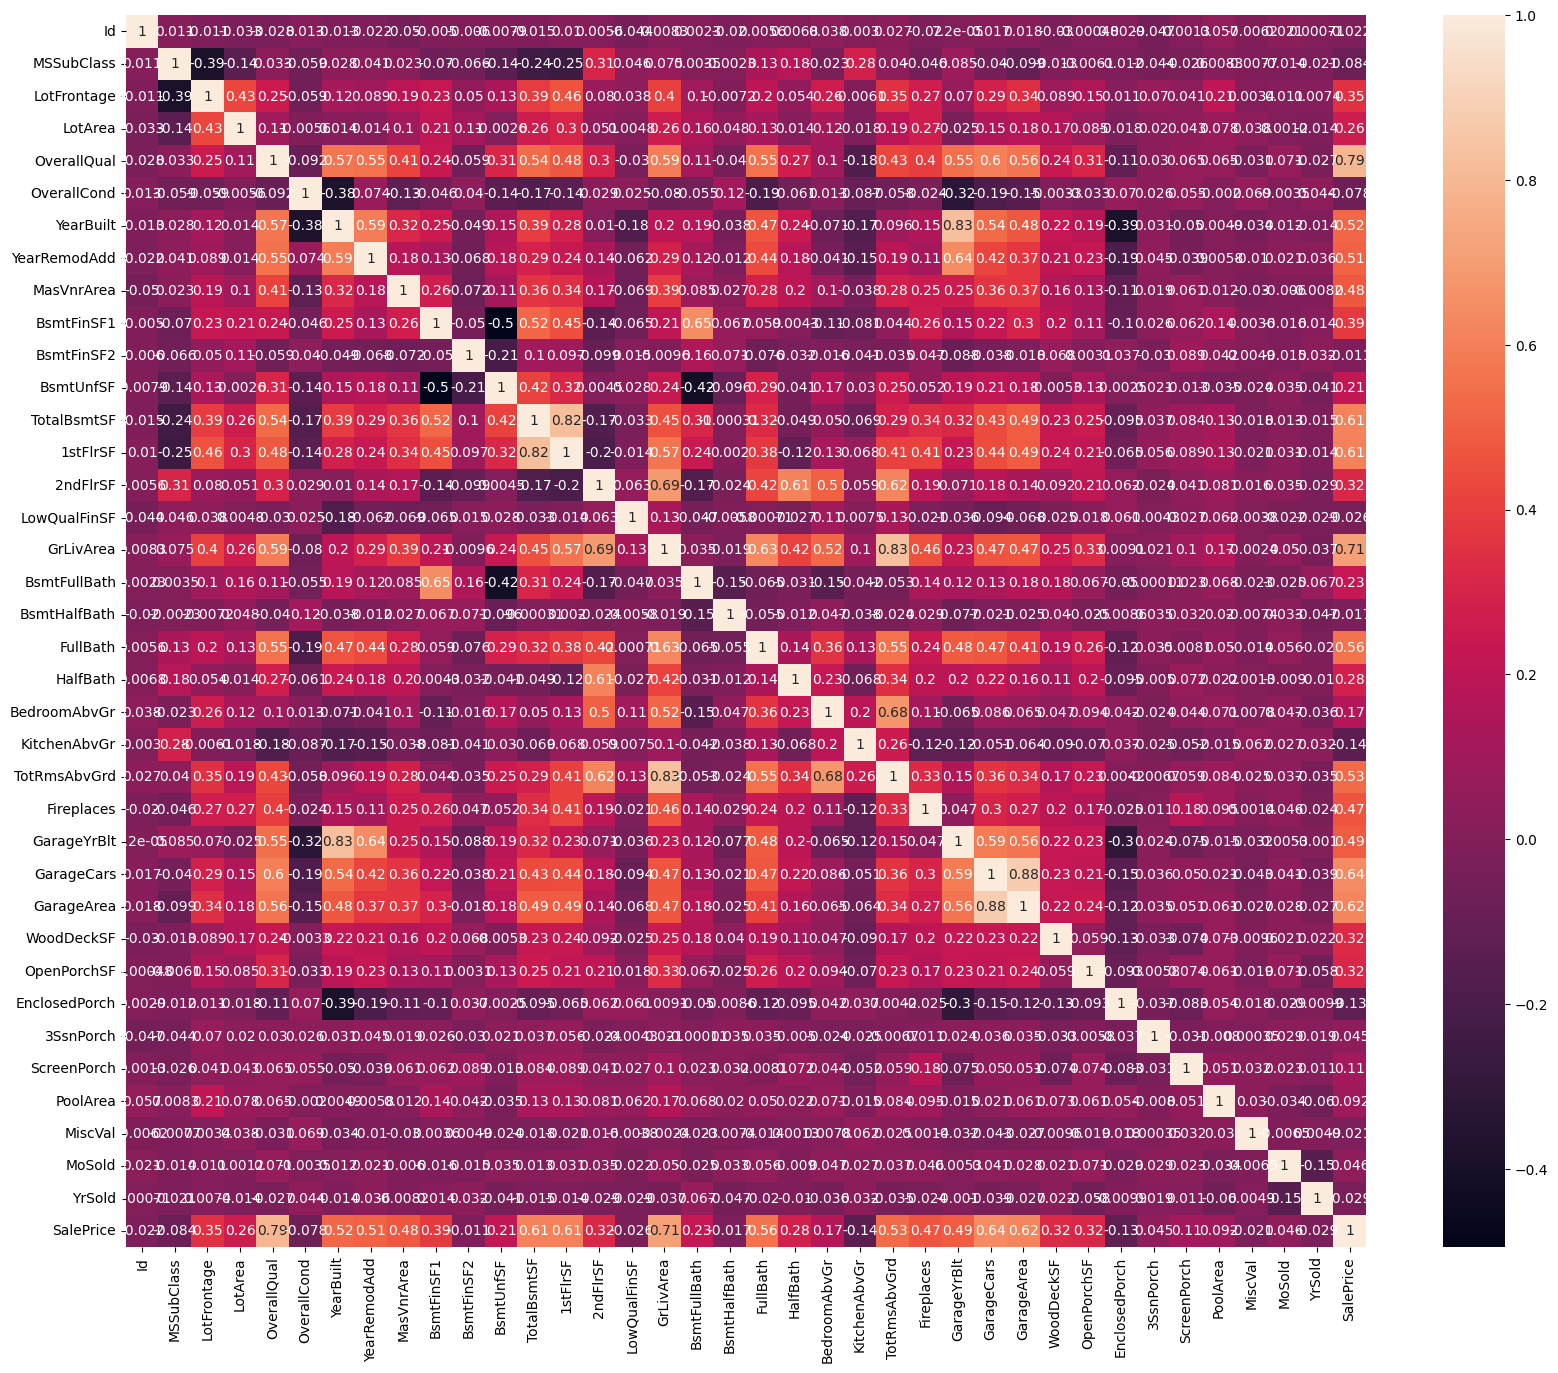

In [216]:
plt.figure(figsize=(20,16))
sns.heatmap(numer_var.corr(),annot=True)
plt.show()

**Comment**
- Some of the features have high correlation with each other
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after data visualization.

#### Univariate and Bivariate Analysis - Numerical Features

##### Analyzing Numerical Features with continuous values

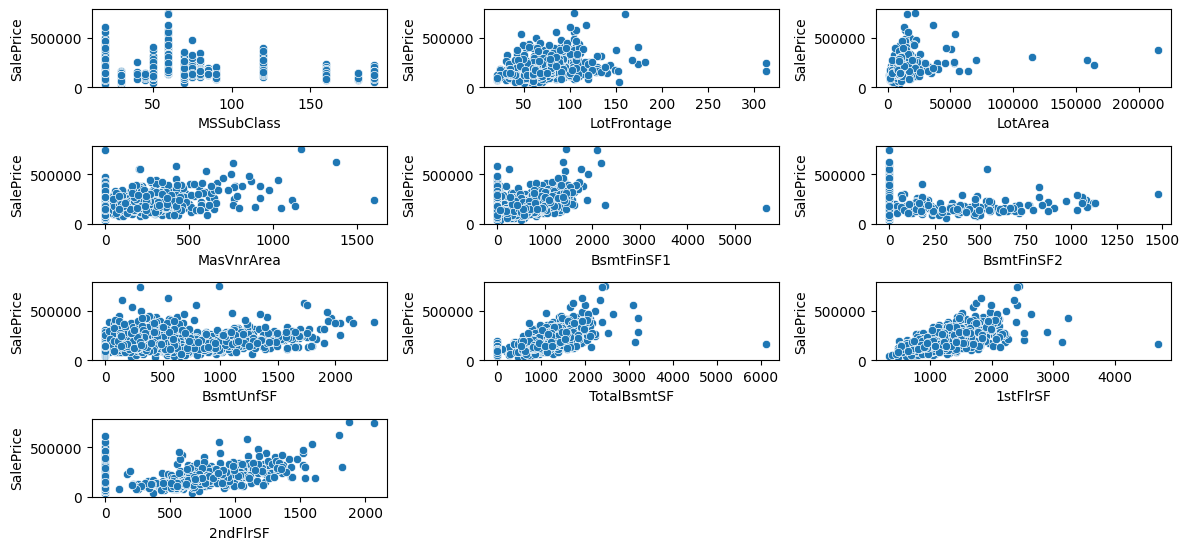

In [217]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data =  df , x =  df[feature], y = df['SalePrice'])
    plt.tight_layout()

**Comment:**

- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values
- 'BsmtSF2' has single value and can be dropped.

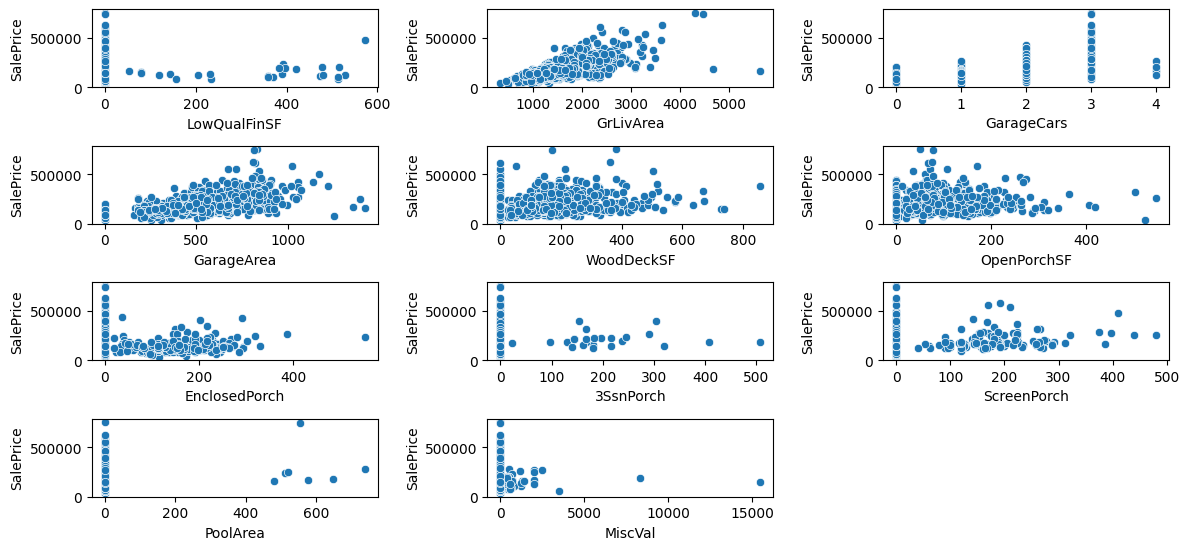

In [218]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data =  df , x =  df[feature], y = df['SalePrice'])
    plt.tight_layout()

**Comment**
- 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
- 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

##### Visualizing the distribution of the numeric features

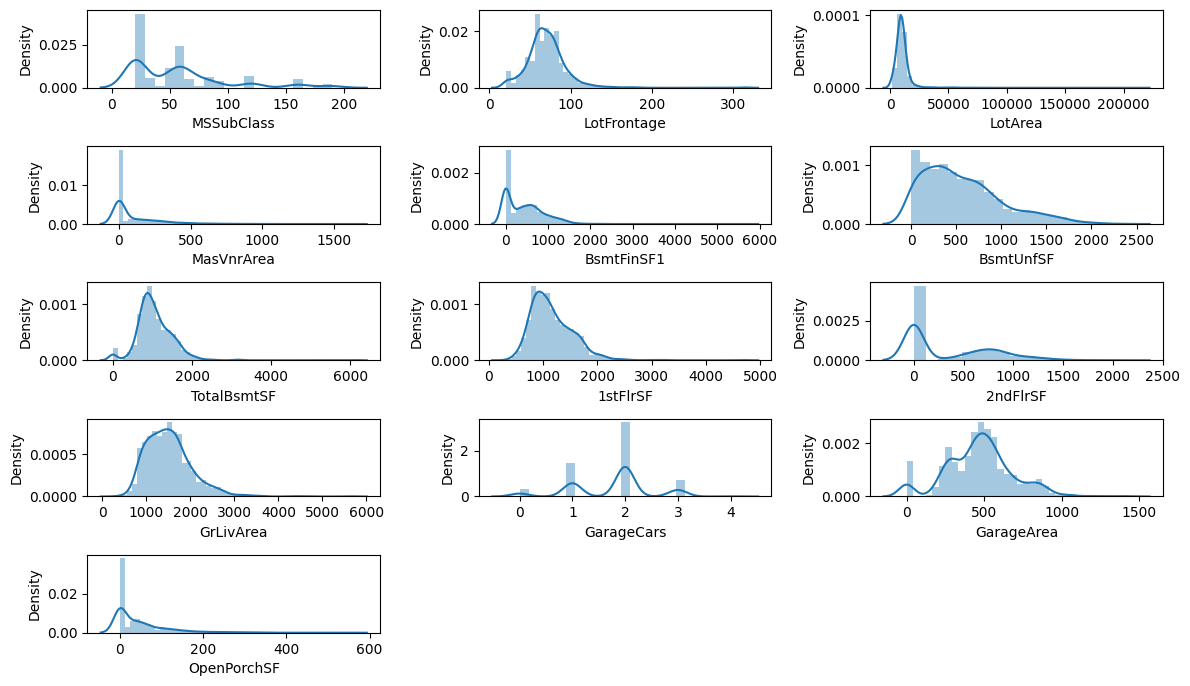

In [219]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot( df[feature])
    plt.tight_layout()

In [220]:
df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF    GrLivArea   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       5.844521  1515.463699     1.767123   472.980137    94.244521   
std       48.623081   525.480383     0.747315   213.804841   125.338794   
min        0.000000   334.000000     0.000000     0.000000     0.000000   
25%        0.000000  1129.500000     1.000000   334.500000     0.000000   
50%        0.000000  1464.000000     2.000000   480.000000     0.000000   
75%        0.000000  1776.750000     2.000000   576.000000   168.000000   
max      572.000000  5642.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal  
count   1460.000000  
mean      43.489041  
std      496.123024  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    15500.000000

Removing these features having fixed values as they won't contribute in predicting SalePrice

In [221]:
df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count   1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean       5.844521      21.954110     3.409589    15.060959     2.758904   
std       48.623081      61.119149    29.317331    55.757415    40.177307   
min        0.000000       0.000000     0.000000     0.000000     0.000000   
25%        0.000000       0.000000     0.000000     0.000000     0.000000   
50%        0.000000       0.000000     0.000000     0.000000     0.000000   
75%        0.000000       0.000000     0.000000     0.000000     0.000000   
max      572.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal  
count   1460.000000  
mean      43.489041  
std      496.123024  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    15500.000000

In [222]:
df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [223]:
# Checking the remaining columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

##### Analyzing Numerical Features with Discrete Values

In [224]:
df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

OverallQual  OverallCond  MoSold  YrSold  BsmtFullBath  BsmtHalfBath  \
0               7            5       2    2008             1             0   
1               6            8       5    2007             0             1   
2               7            5       9    2008             1             0   
3               7            5       2    2006             1             0   
4               8            5      12    2008             1             0   
5               5            5      10    2009             1             0   
6               8            5       8    2007             1             0   
7               7            6      11    2009             1             0   
8               7            5       4    2008             0             0   
9               5            6       1    2008             1             0   
10              5            5       2    2008             1             0   
11              9            5       7    2006             1             0   
12              5            6       9    2008             1             0   
13              7            5       8    2007             0             0   
14              6            5       5    2008             1             0   
15              7            8       7    2007             0             0   
16              6            7       3    2010             1             0   
17              4            5      10    2006             0             0   
18              5            5       6    2008             1             0   
19              5            6       5    2009             0             0   
20              8            5      11    2006             0             0   
21              7            7       6    2007             0             0   
22              8            5       9    2008             0             0   
23              5            7       6    2007             1             0   
24              5            8       5    2010             1             0   
25              8            5       7    2009             0             0   
26              5            7       5    2010             0             1   
27              8            5       5    2010             1             0   
28              5            6      12    2006             1             0   
29              4            6       5    2008             0             0   
30              4            4       7    2008             0             0   
31              5            6       6    2008             0             0   
32              8            5       1    2008             0             0   
33              5            5       4    2010             0             1   
34              9            5       8    2007             1             0   
35              8            5       9    2006             0             0   
36              5            5       6    2009             0             0   
37              5            6      10    2009             0             1   
38              5            7       1    2010             1             0   
39              4            5       6    2008             0             0   
40              6            5      12    2006             0             0   
41              5            6       7    2007             0             1   
42              5            7      12    2007             1             0   
43              5            6       7    2008             1             0   
44              5            6       5    2006             1             0   
45              9            5       2    2010             1             0   
46              7            5       8    2009             1             0   
47              8            5       7    2007             0             0   
48              4            5       6    2009             0             0   
49              5            7       1    2007             1             0   
50              6           

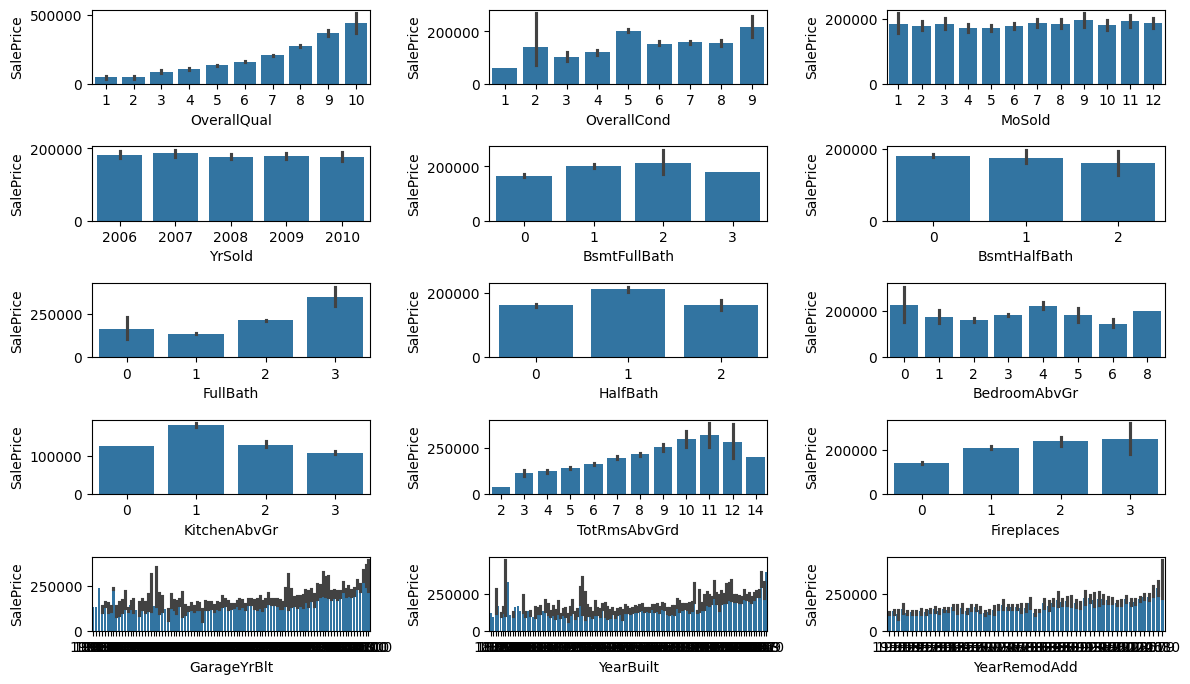

In [225]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(data = df , x = df[feature], y = df['SalePrice'])
    plt.tight_layout()

**Comment:**
Following are the observations from the plots.
- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice

- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

- 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

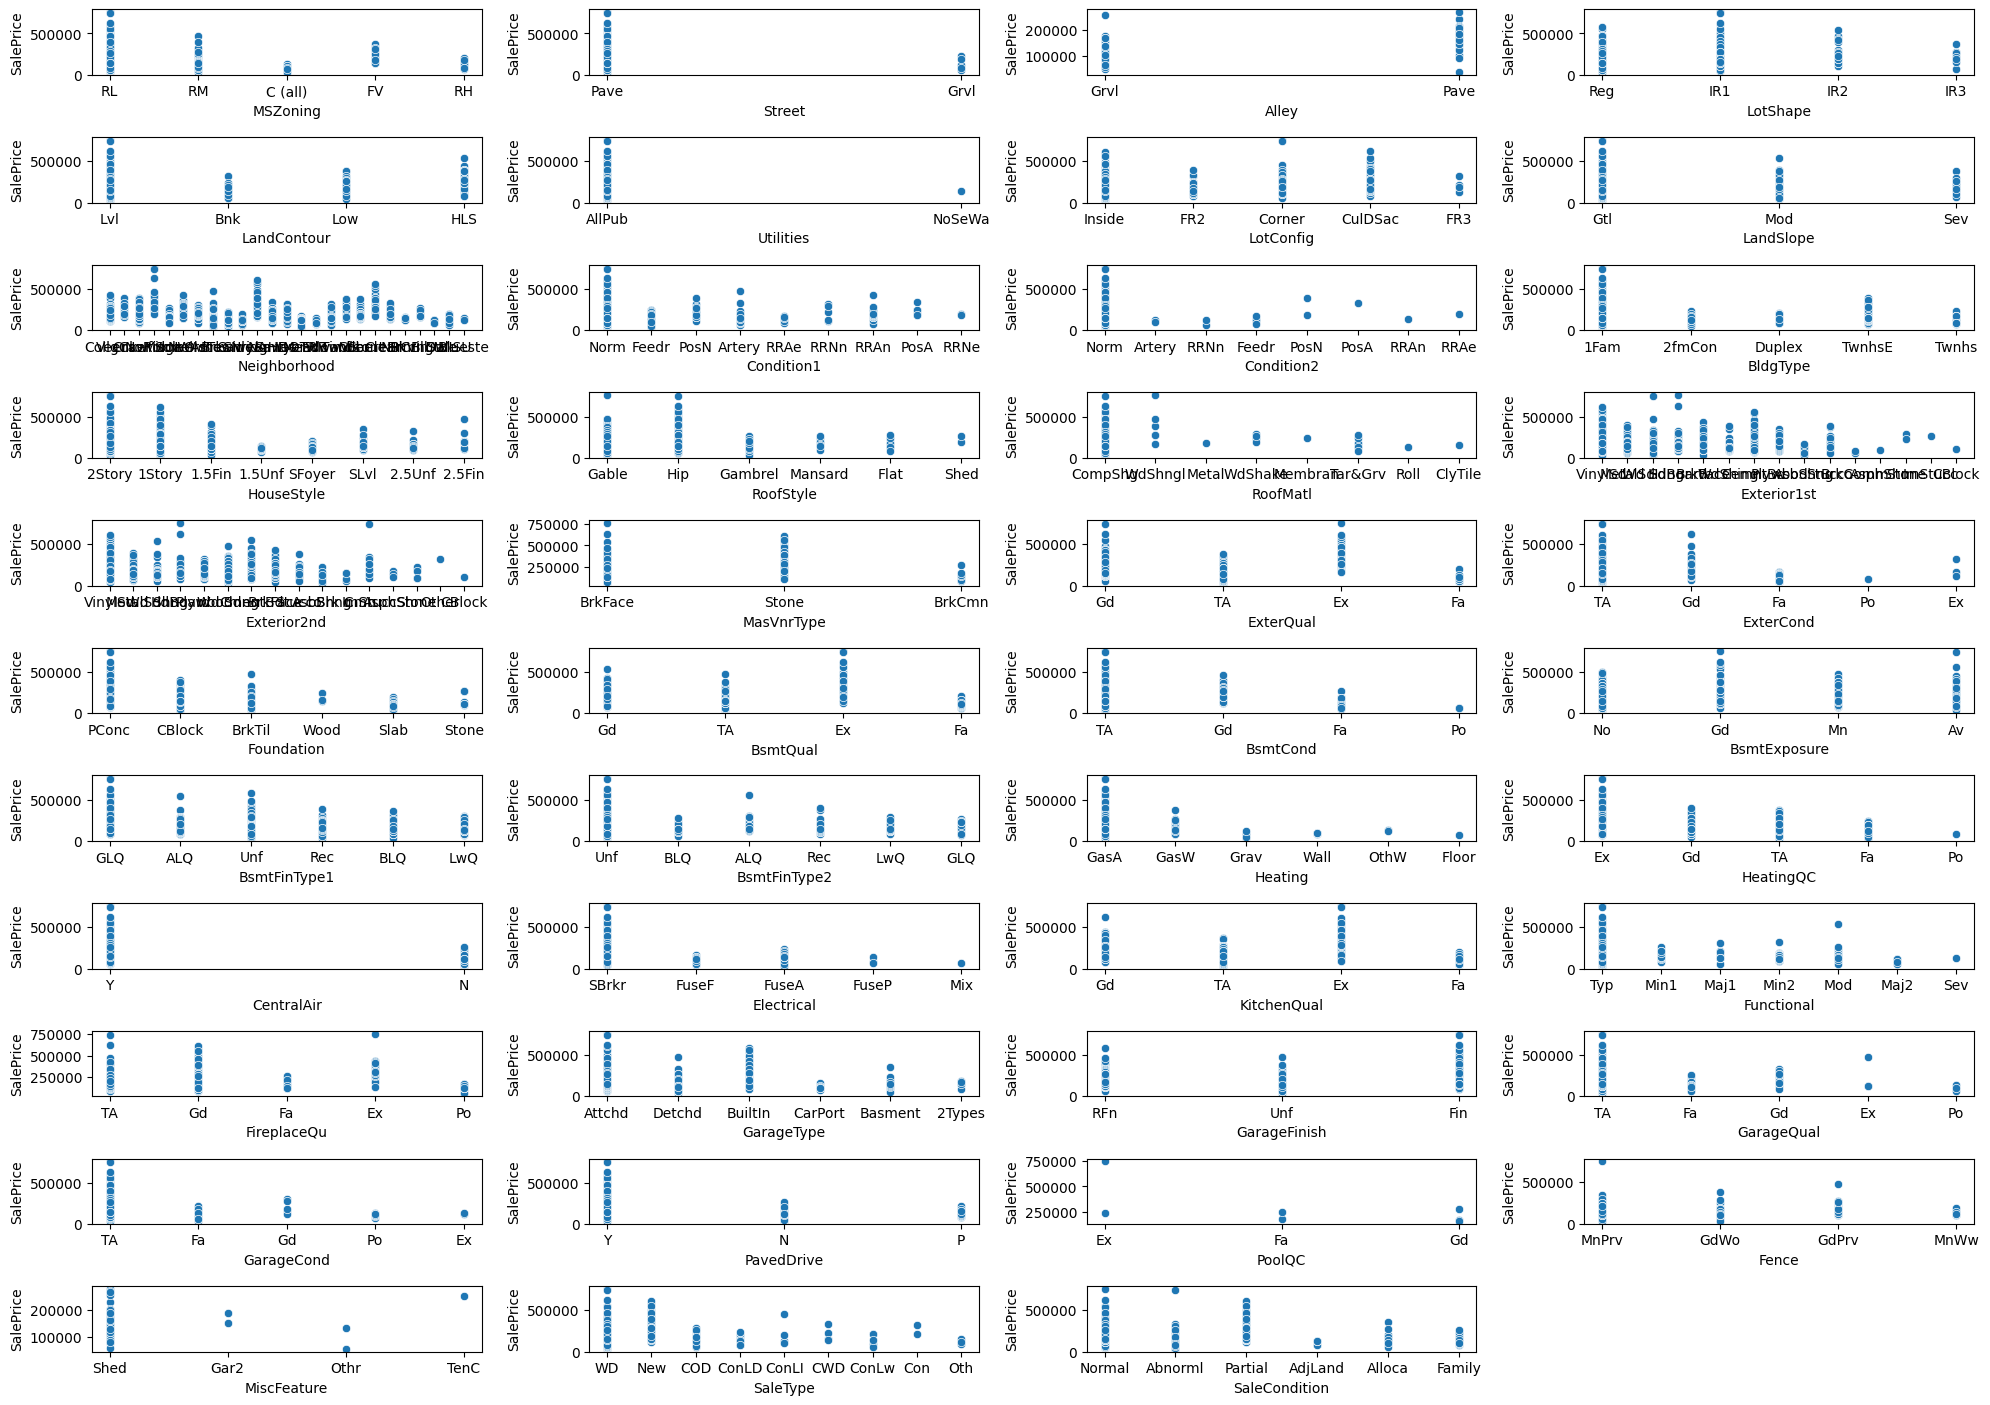

In [226]:
fig = plt.subplots(figsize = (20 , 15))

for i , j in enumerate(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition']):
  plt.subplot(12, 4, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.scatterplot(data = cat_var , x = cat_var[j], y = numer_var['SalePrice'])
  plt.tight_layout()

In [227]:
df[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

BsmtFullBath  KitchenAbvGr  GarageYrBlt    YearBuilt  YearRemodAdd
count   1460.000000   1460.000000  1379.000000  1460.000000   1460.000000
mean       0.425342      1.046575  1978.506164  1971.267808   1984.865753
std        0.518911      0.220338    24.689725    30.202904     20.645407
min        0.000000      0.000000  1900.000000  1872.000000   1950.000000
25%        0.000000      1.000000  1961.000000  1954.000000   1967.000000
50%        0.000000      1.000000  1980.000000  1973.000000   1994.000000
75%        1.000000      1.000000  2002.000000  2000.000000   2004.000000
max        3.000000      3.000000  2010.000000  2010.000000   2010.000000

In [228]:
print(df['BsmtFullBath'].value_counts())
print(df['KitchenAbvGr'].value_counts())

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64
KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64


In [229]:
# dropping KitchenAbvGr for not having useful information
df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [230]:
df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

GarageYrBlt    YearBuilt  YearRemodAdd       YrSold
count  1379.000000  1460.000000   1460.000000  1460.000000
mean   1978.506164  1971.267808   1984.865753  2007.815753
std      24.689725    30.202904     20.645407     1.328095
min    1900.000000  1872.000000   1950.000000  2006.000000
25%    1961.000000  1954.000000   1967.000000  2007.000000
50%    1980.000000  1973.000000   1994.000000  2008.000000
75%    2002.000000  2000.000000   2004.000000  2009.000000
max    2010.000000  2010.000000   2010.000000  2010.000000

In [231]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    df[feature] = 2021 - df[feature]

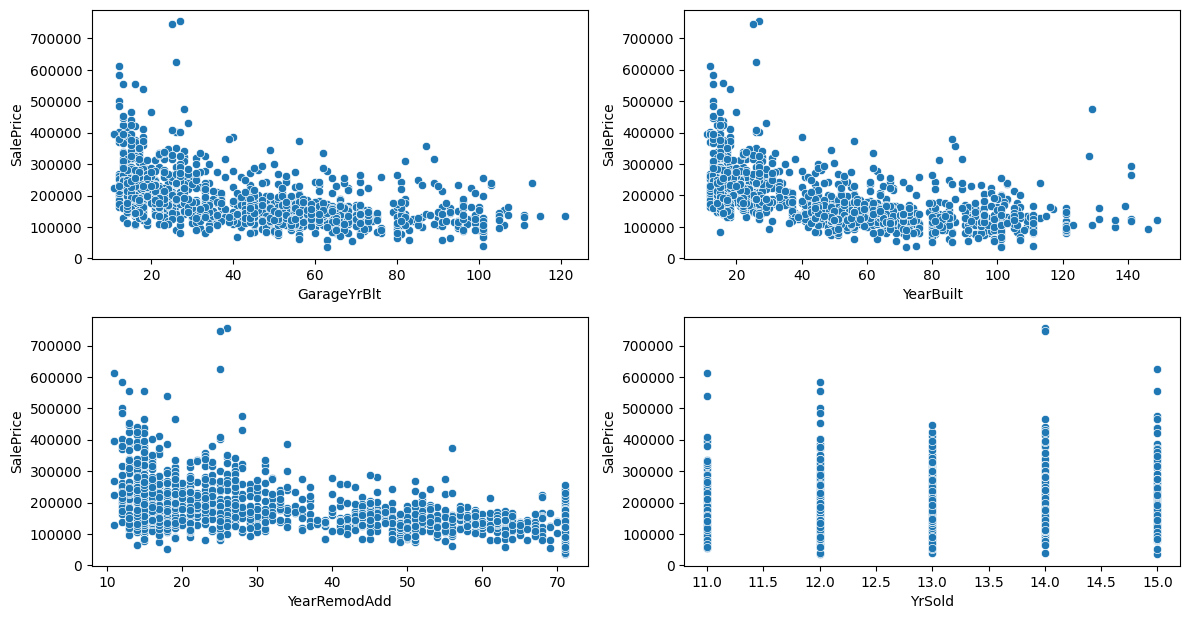

In [232]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data = df , x = df[feature], y = df['SalePrice'])
    plt.tight_layout()

**Comment:**
- For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
- SalePrice is more lower value of YearBuilt i.e. more recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice
- YrSold still does not show any significant trend

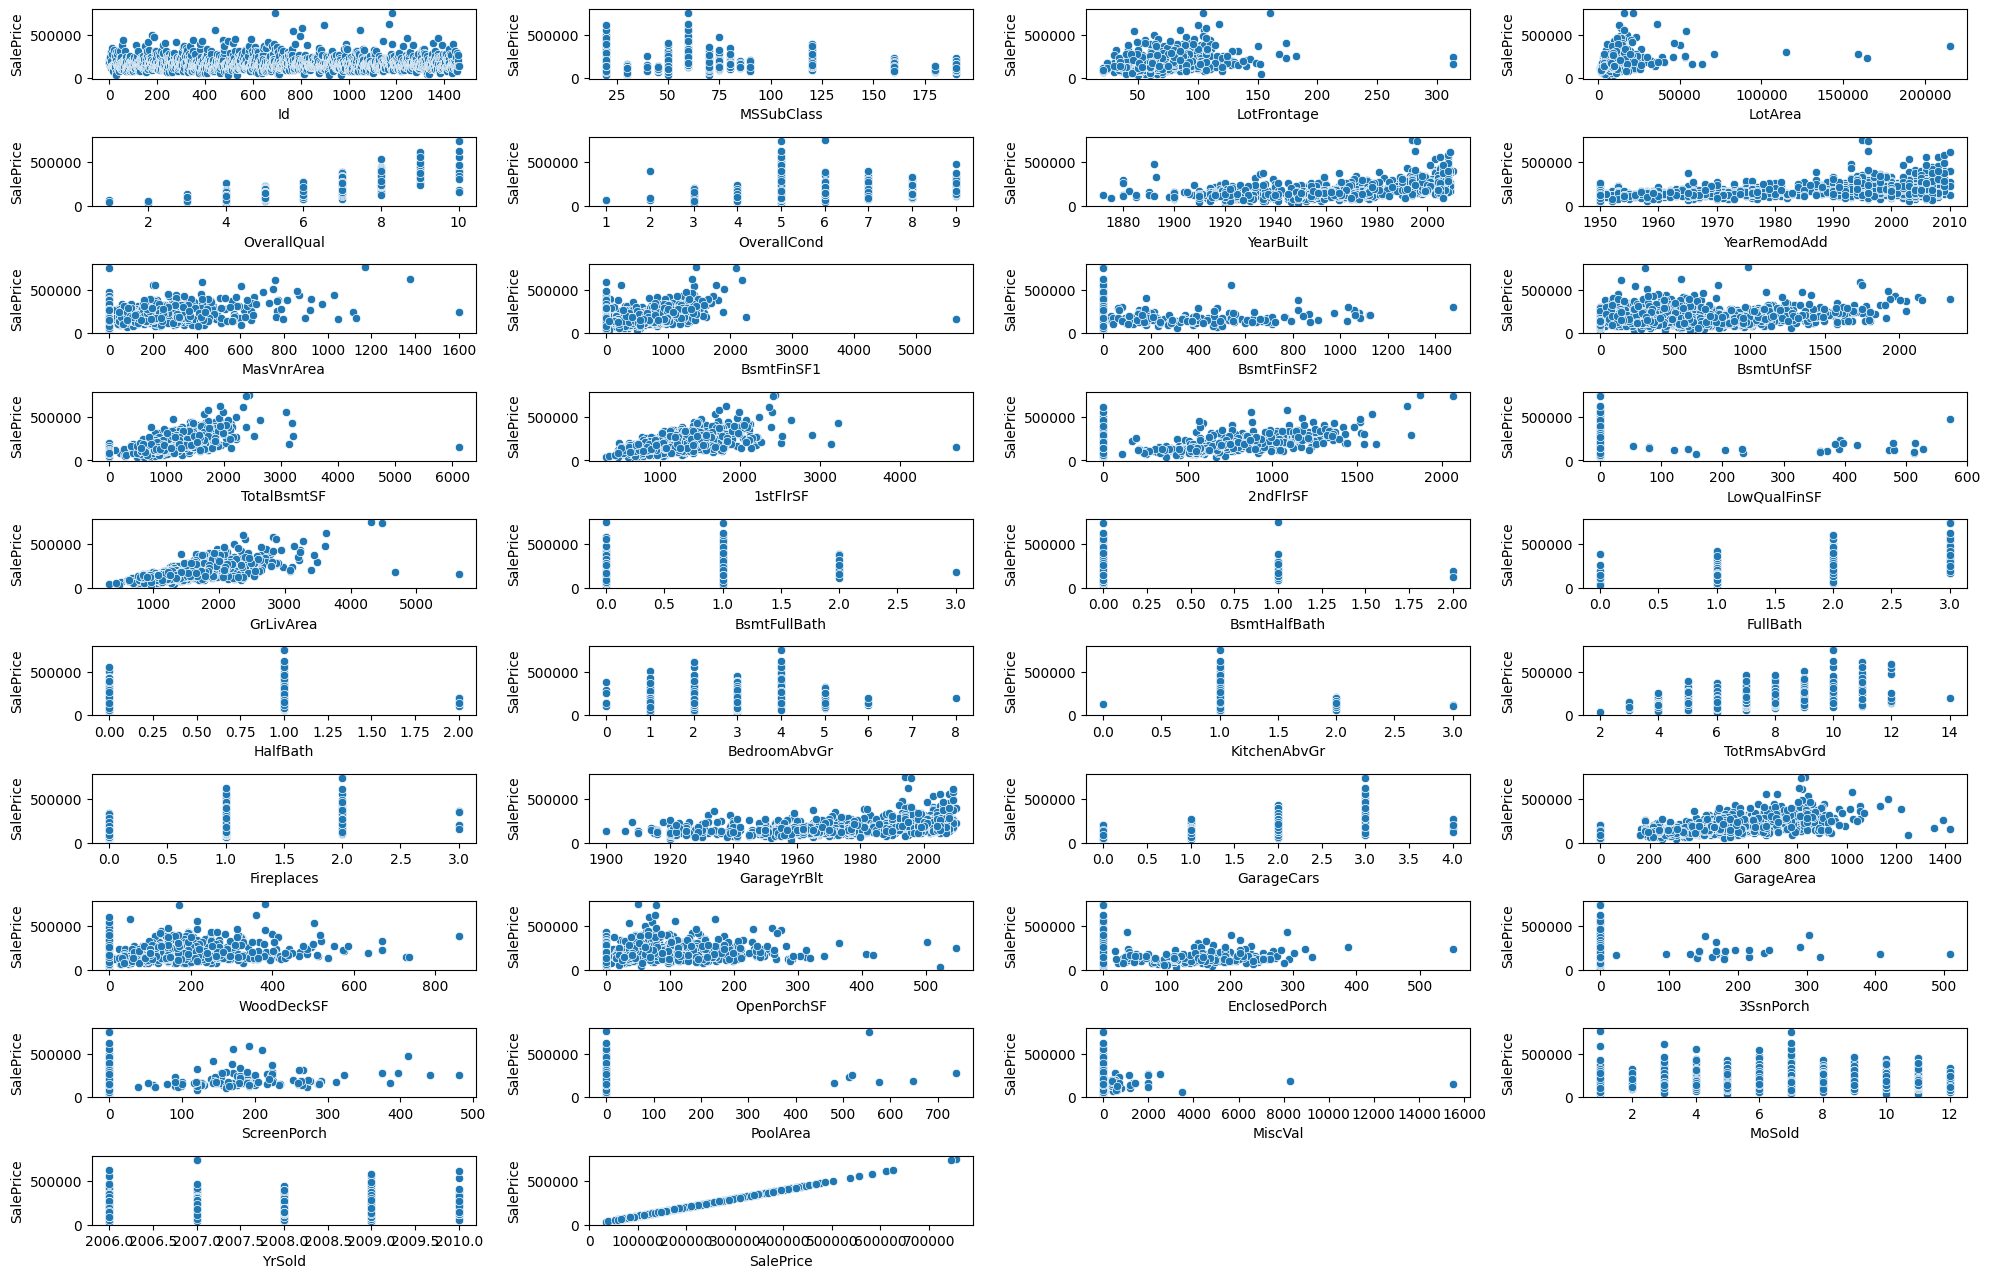

In [233]:
fig = plt.subplots(figsize = (20 , 15))

for i , j in enumerate(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold', 'SalePrice']):
  plt.subplot(12, 4, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.scatterplot(data = numer_var , x = numer_var[j], y = numer_var['SalePrice'])
  plt.tight_layout()

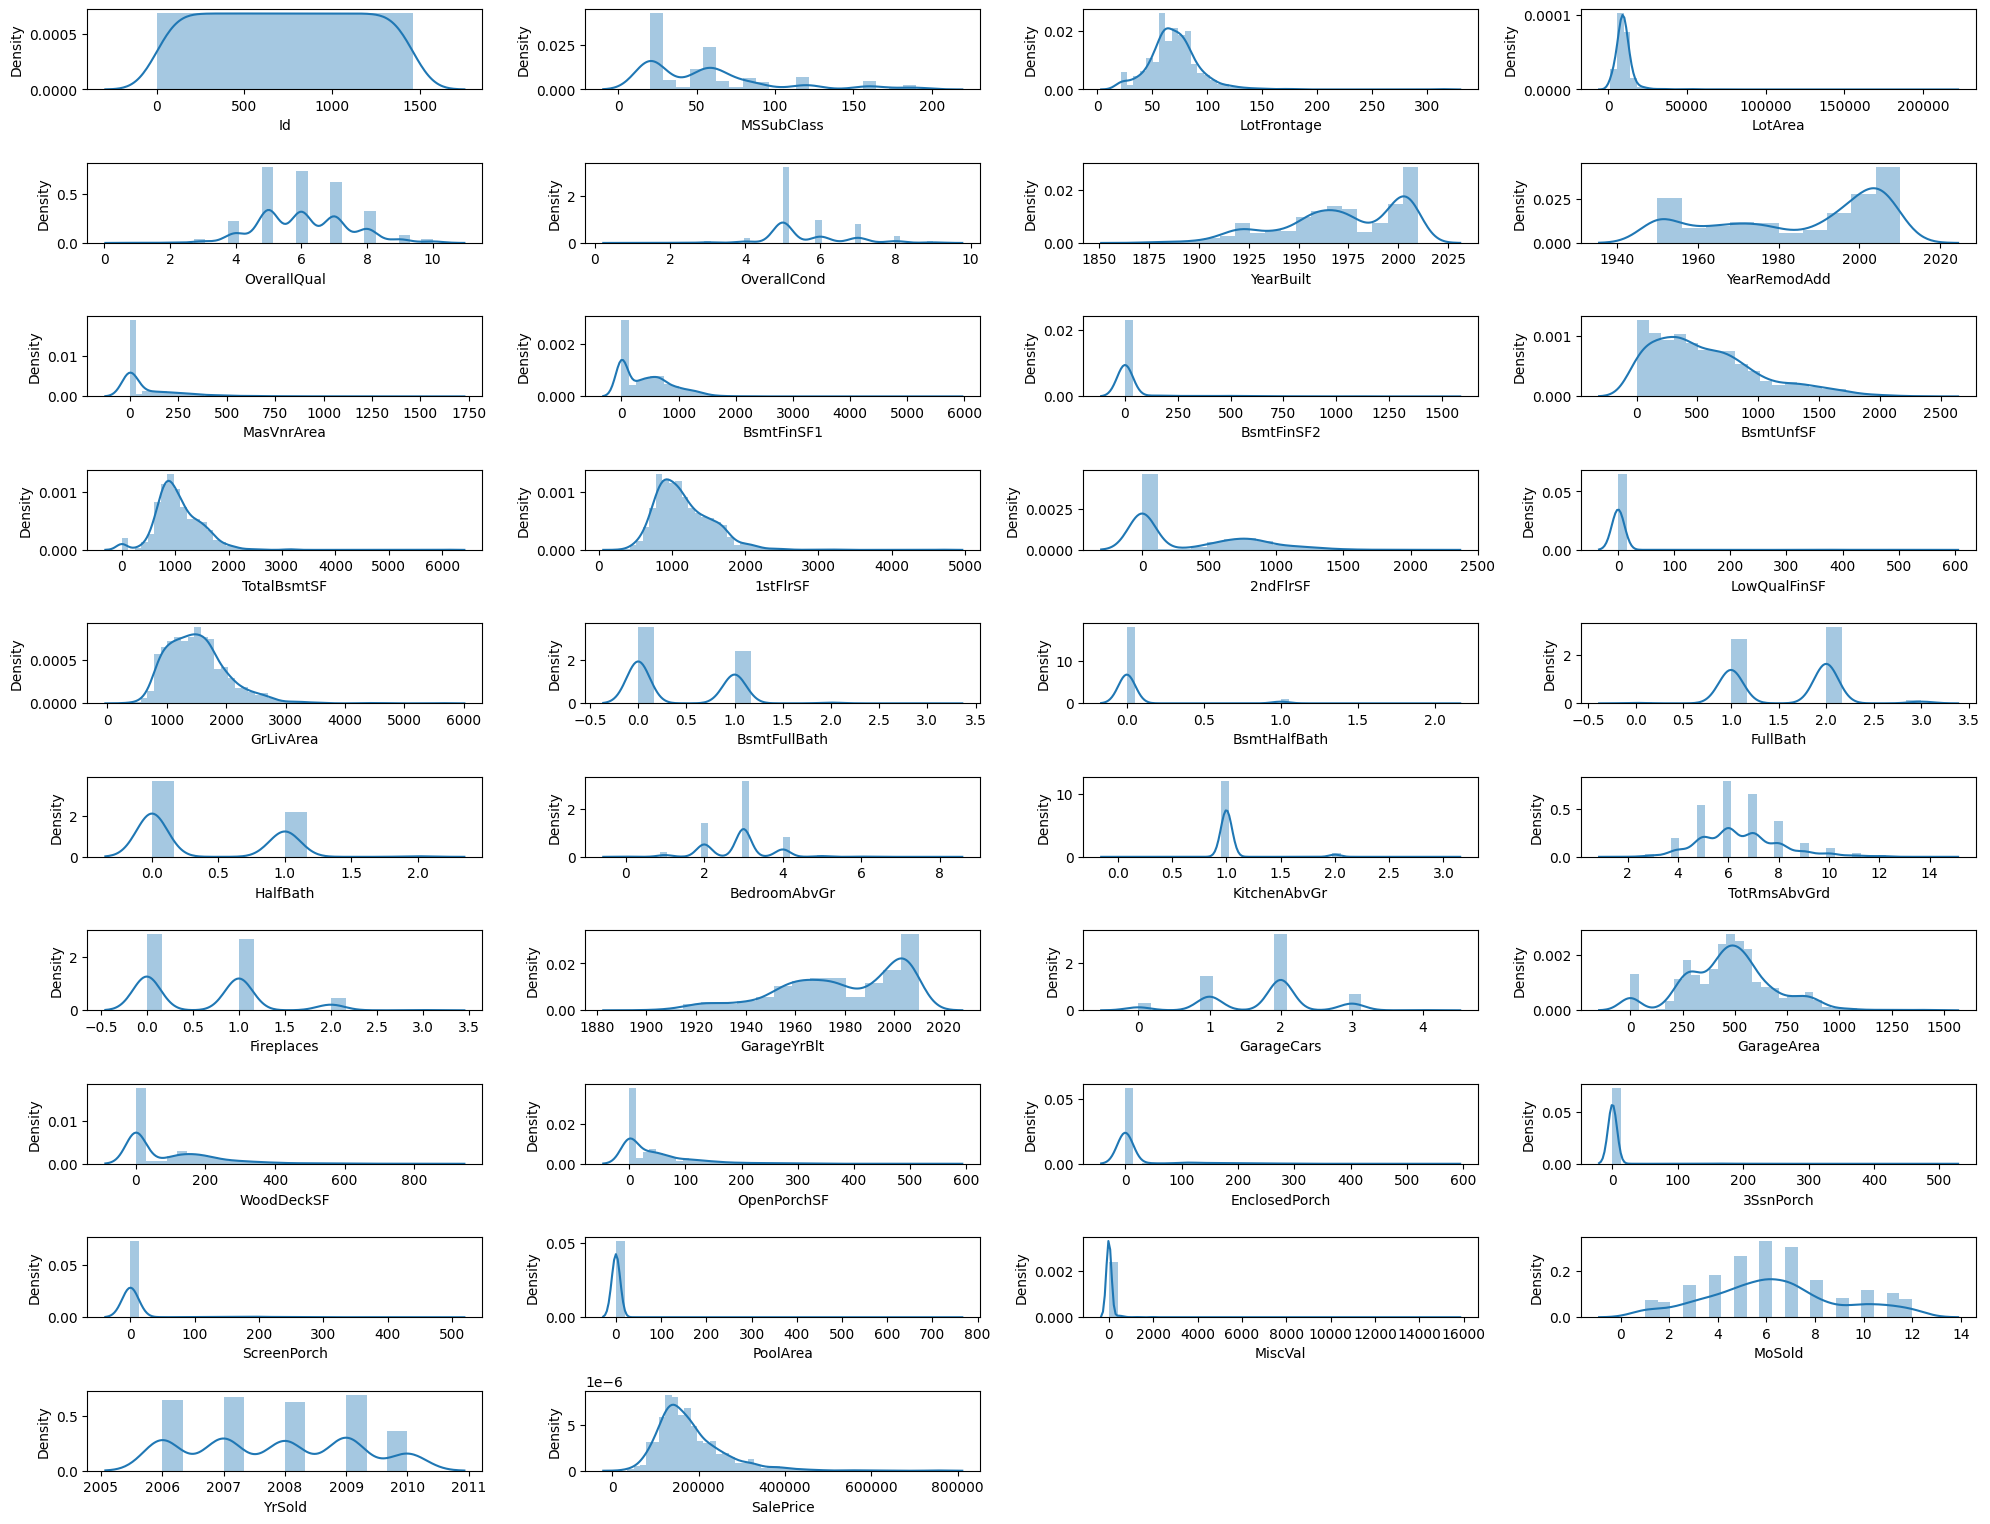

In [234]:
fig = plt.subplots(figsize = (20 , 18))

for i , j in enumerate(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold', 'SalePrice']):
  plt.subplot(12,4, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.distplot(numer_var[j])
  plt.tight_layout()

#### Missing Value Handling - Numerical Features

In [129]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in df.select_dtypes(exclude=['object']).columns:
    if df[feat].isnull().any():
        print(feat, ' : ',  round(df[feat].isnull().sum()/df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [130]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

df = df[~df['MasVnrArea'].isnull()]
df.drop(['Id'], axis=1, inplace=True)
numer_var.drop(['Id'], axis=1, inplace=True)

In [131]:
# Checking the number of remaining columns
df.columns.shape

(73,)

**Comment:**

- GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
- GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
- TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
- Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [132]:
df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(df.columns.shape)

(69,)


### Analyzing Categorical Features

In [133]:
# Categorical features in the dataframe
cat_var.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Missing Value Handling - Categorical Features

In [134]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in df.select_dtypes(include=['object']).columns:
    if df[feat].isnull().any():
        print(feat, ':', round(df[feat].isnull().sum()/df.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
MasVnrType : 60.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [135]:
df['Electrical'].isnull().sum()

1

In [136]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

**Comment:**
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.

All these features will be imputed with meaningful values in place of missing data.

In [137]:
New_cat_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(df[New_cat_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [138]:
# Imputing missing values with "Not_applicable"
df[New_cat_features] = df[New_cat_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(df[New_cat_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [139]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
df.dropna(subset=['Electrical'], inplace=True)

In [141]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in df.columns:
    if df[feat].isnull().any():
        print(feat, ':', round(df[feat].isnull().sum()/df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0
MasVnrType : 59.0


Missing value imputation will be done after splitting the data into train and test set to avoid data leakage.

In [142]:
df.columns.shape

(68,)

**Encoding For Categorical Variables**
**Ordered Features -- to be label encoded**
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [143]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(data =  df , x = df['SalePrice'], y =   df[feature])
        plt.tight_layout()

Dividing the ordinal features into smaller segments and visualizing their impact on SalePrice.

#### Analyzing Ordered Features

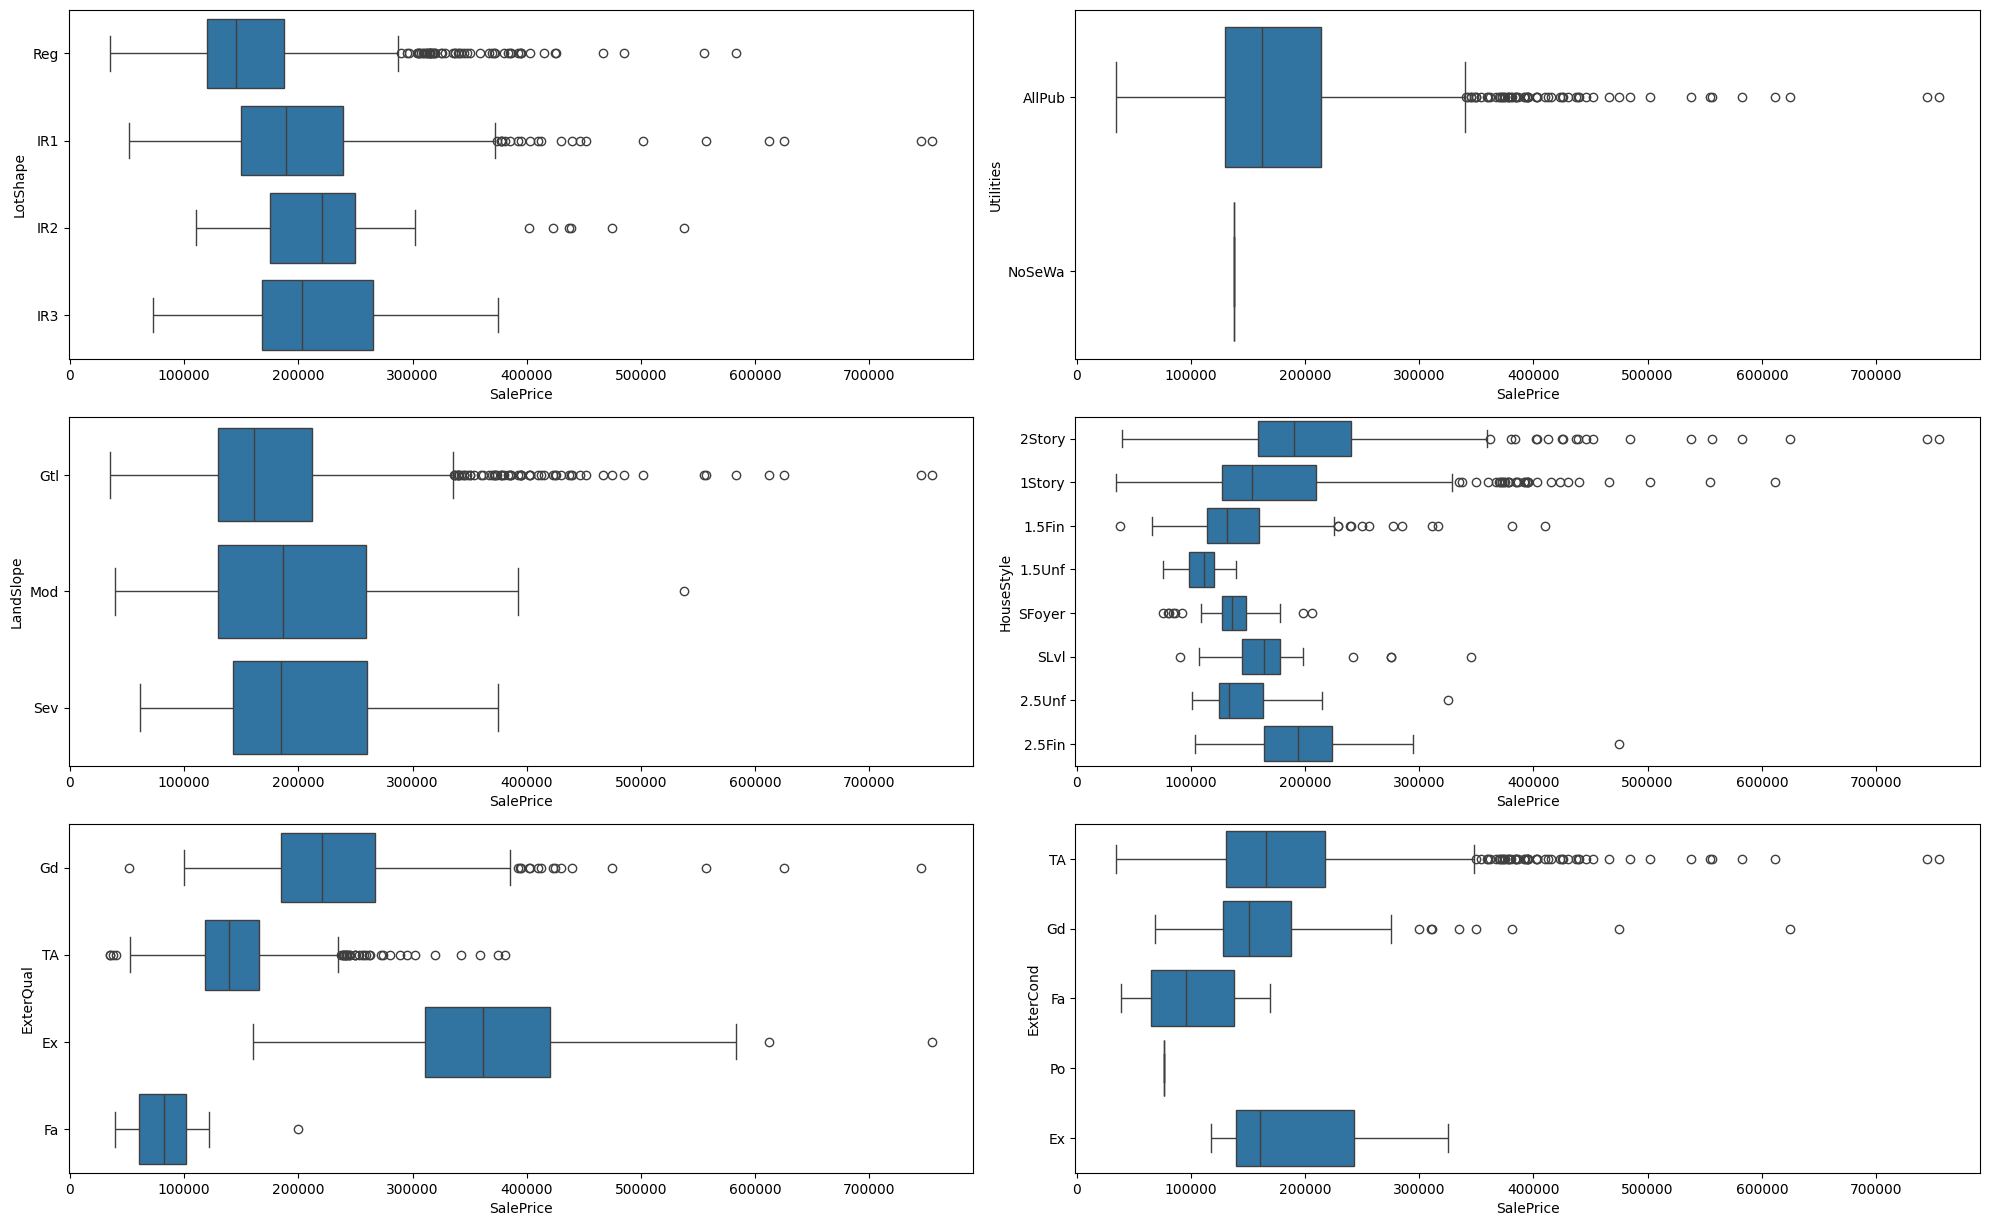

In [44]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(ext_features)

**Comment:**
- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

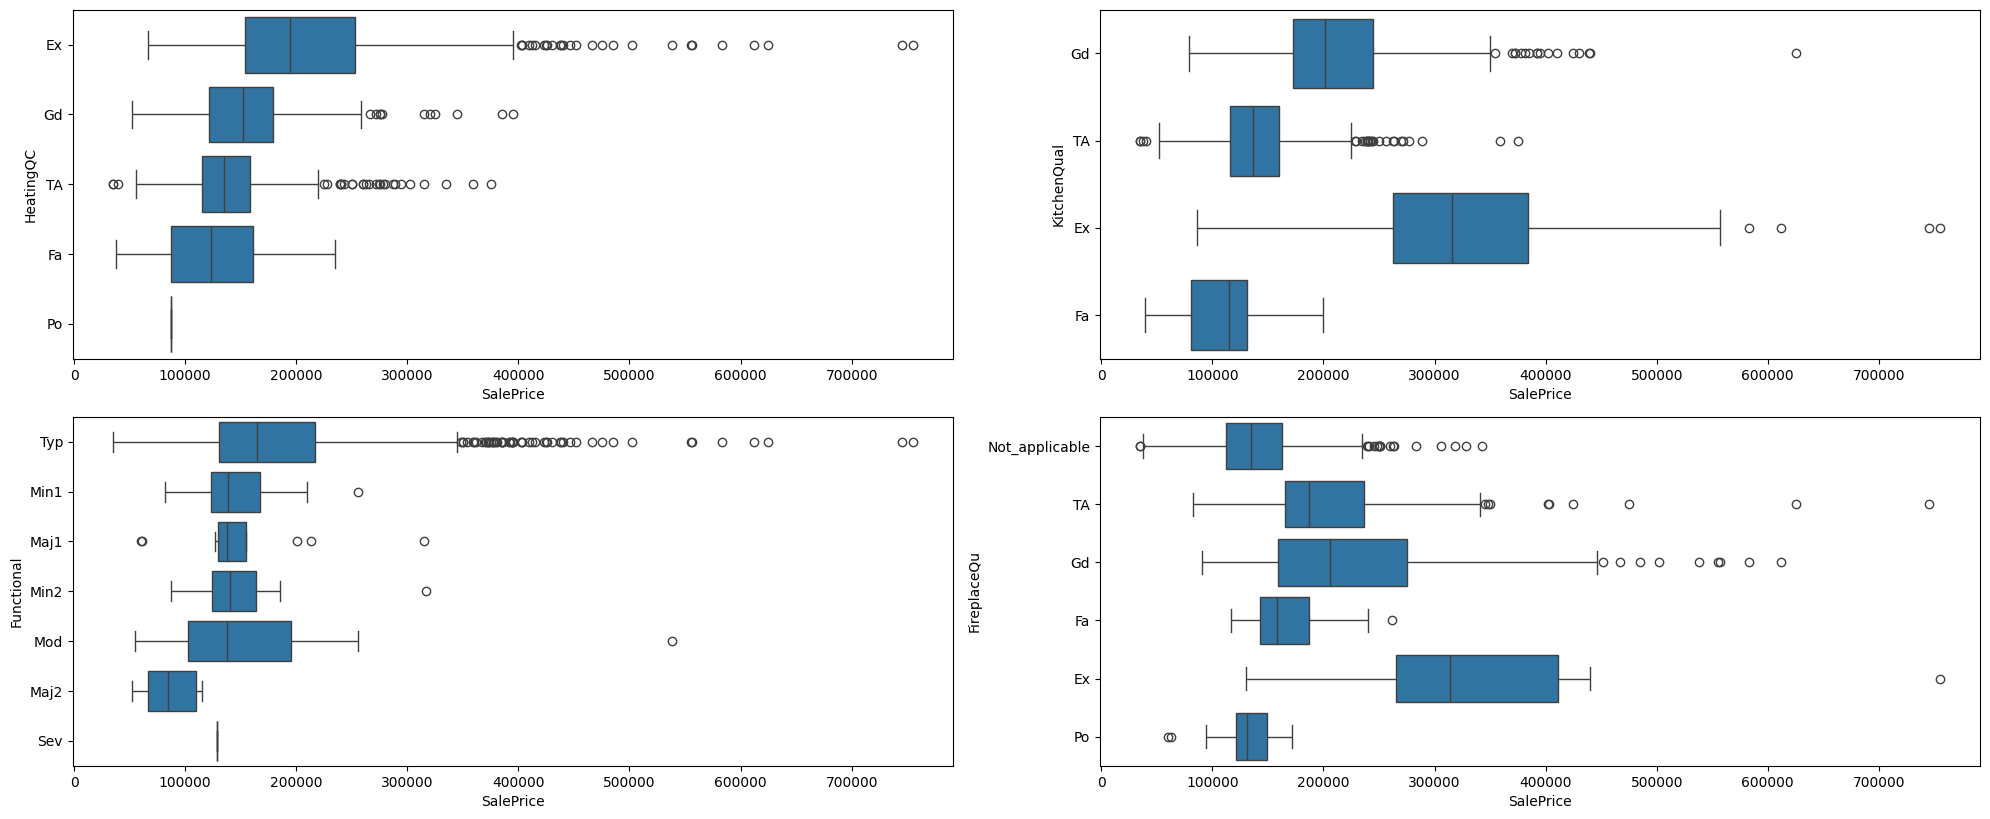

In [45]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

**Comment:**

- Houses having excellent heating quality and kitchen quality have the highest SalePrice
- Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- SalePrice range in largest for houses with average fireplace quality.

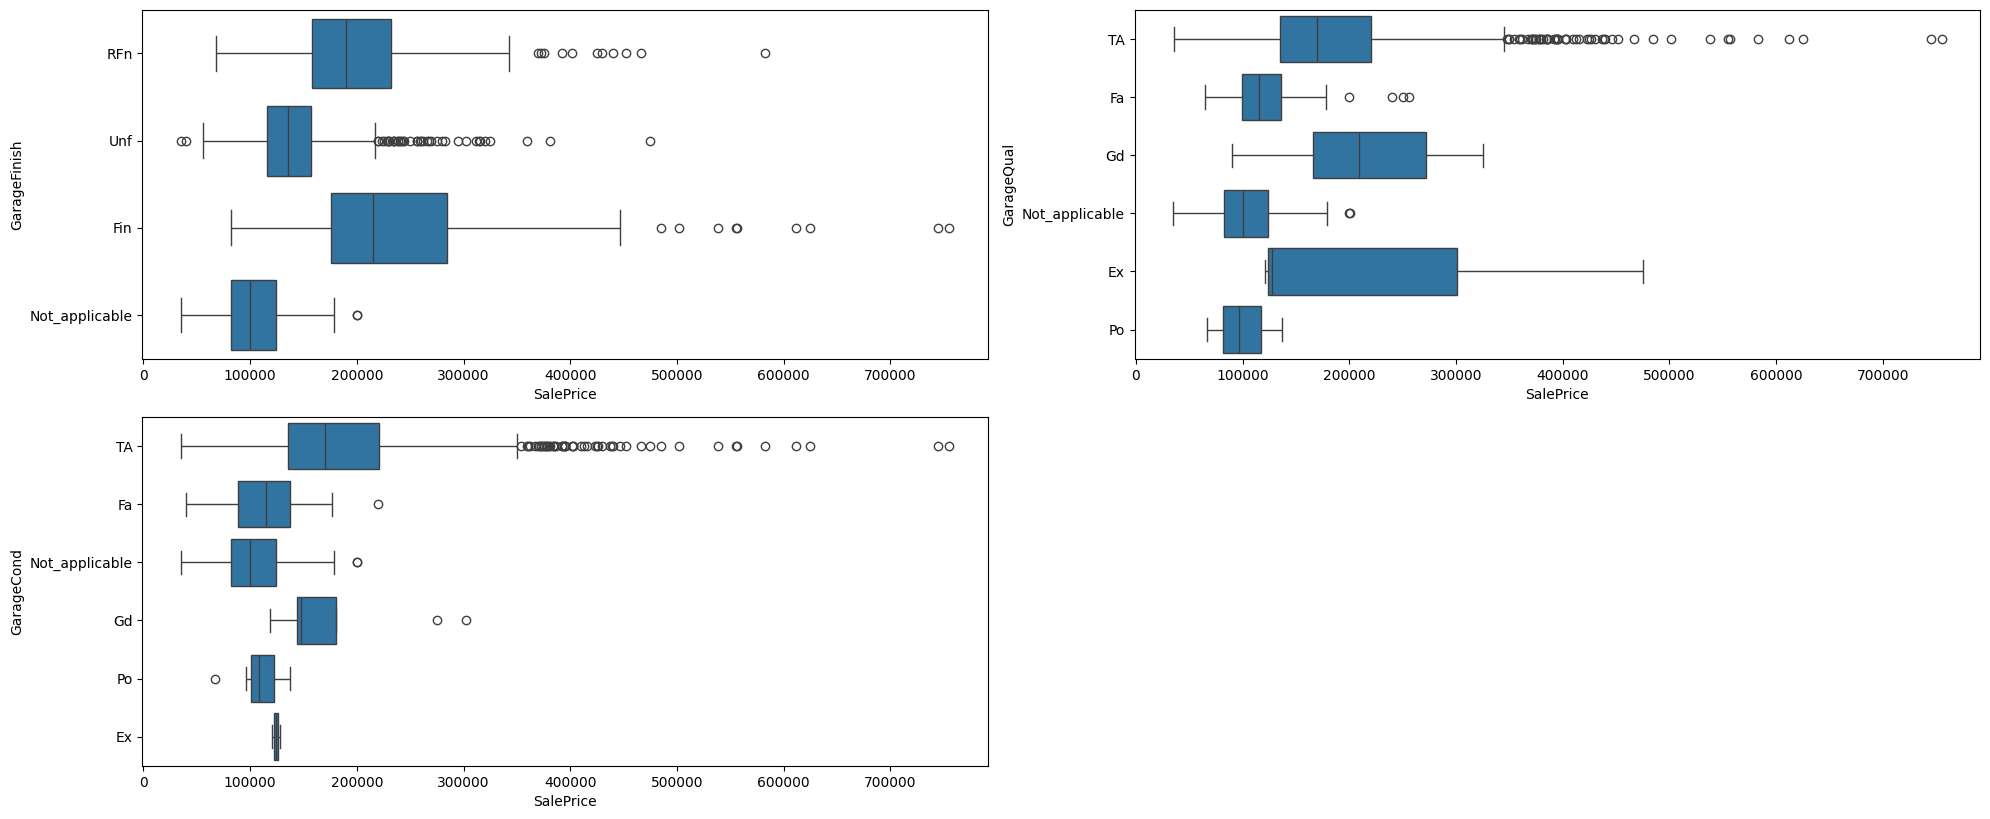

In [46]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

**Comment:**

- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.

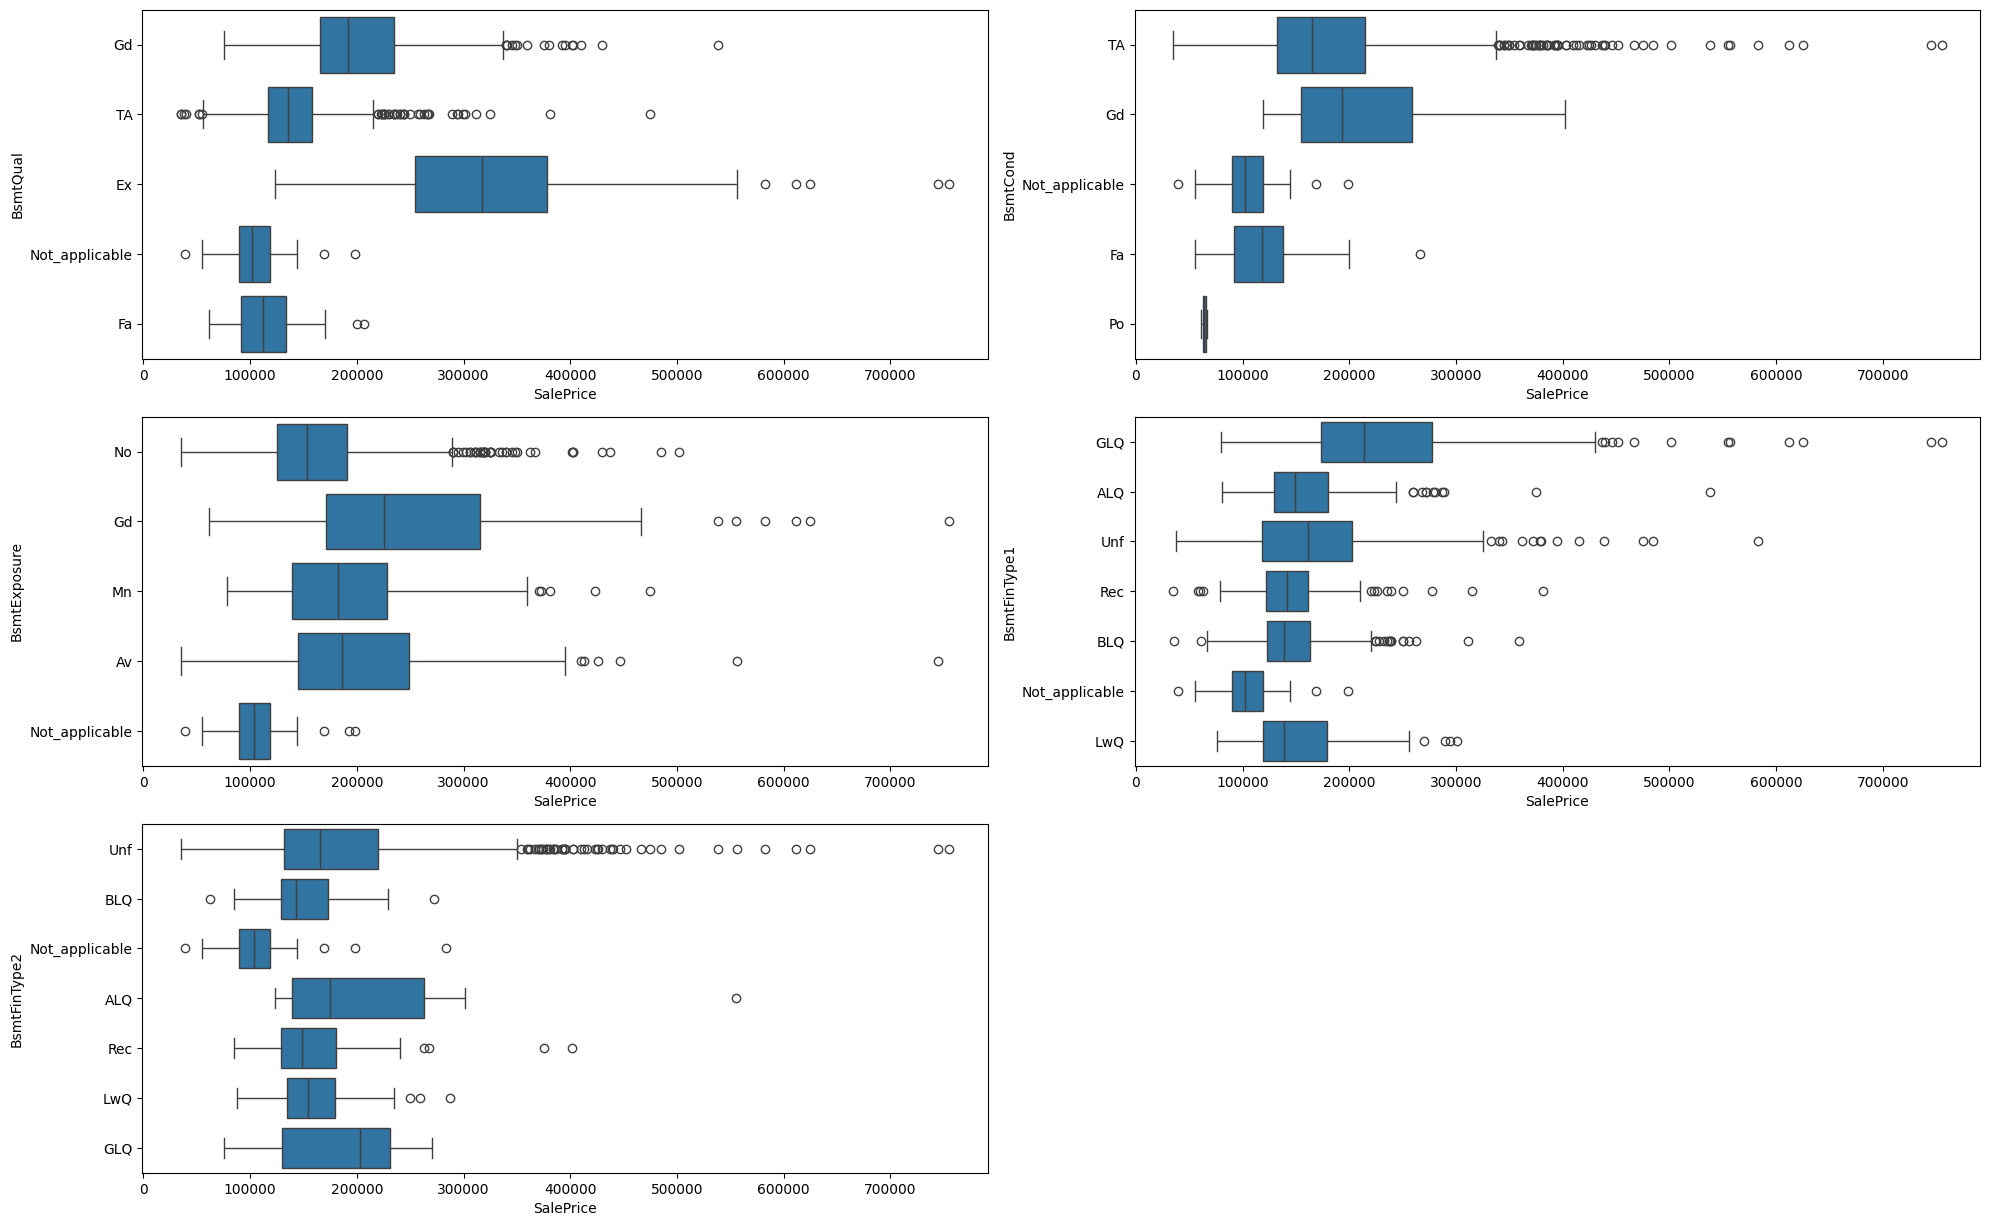

In [47]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

**Comment:**

- Houses with excellent quality basement have the highest SalePrice
- Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- A lot of houses have unfinished basment or no basement (label = Not_applicable)

<Figure size 4000x3000 with 0 Axes>

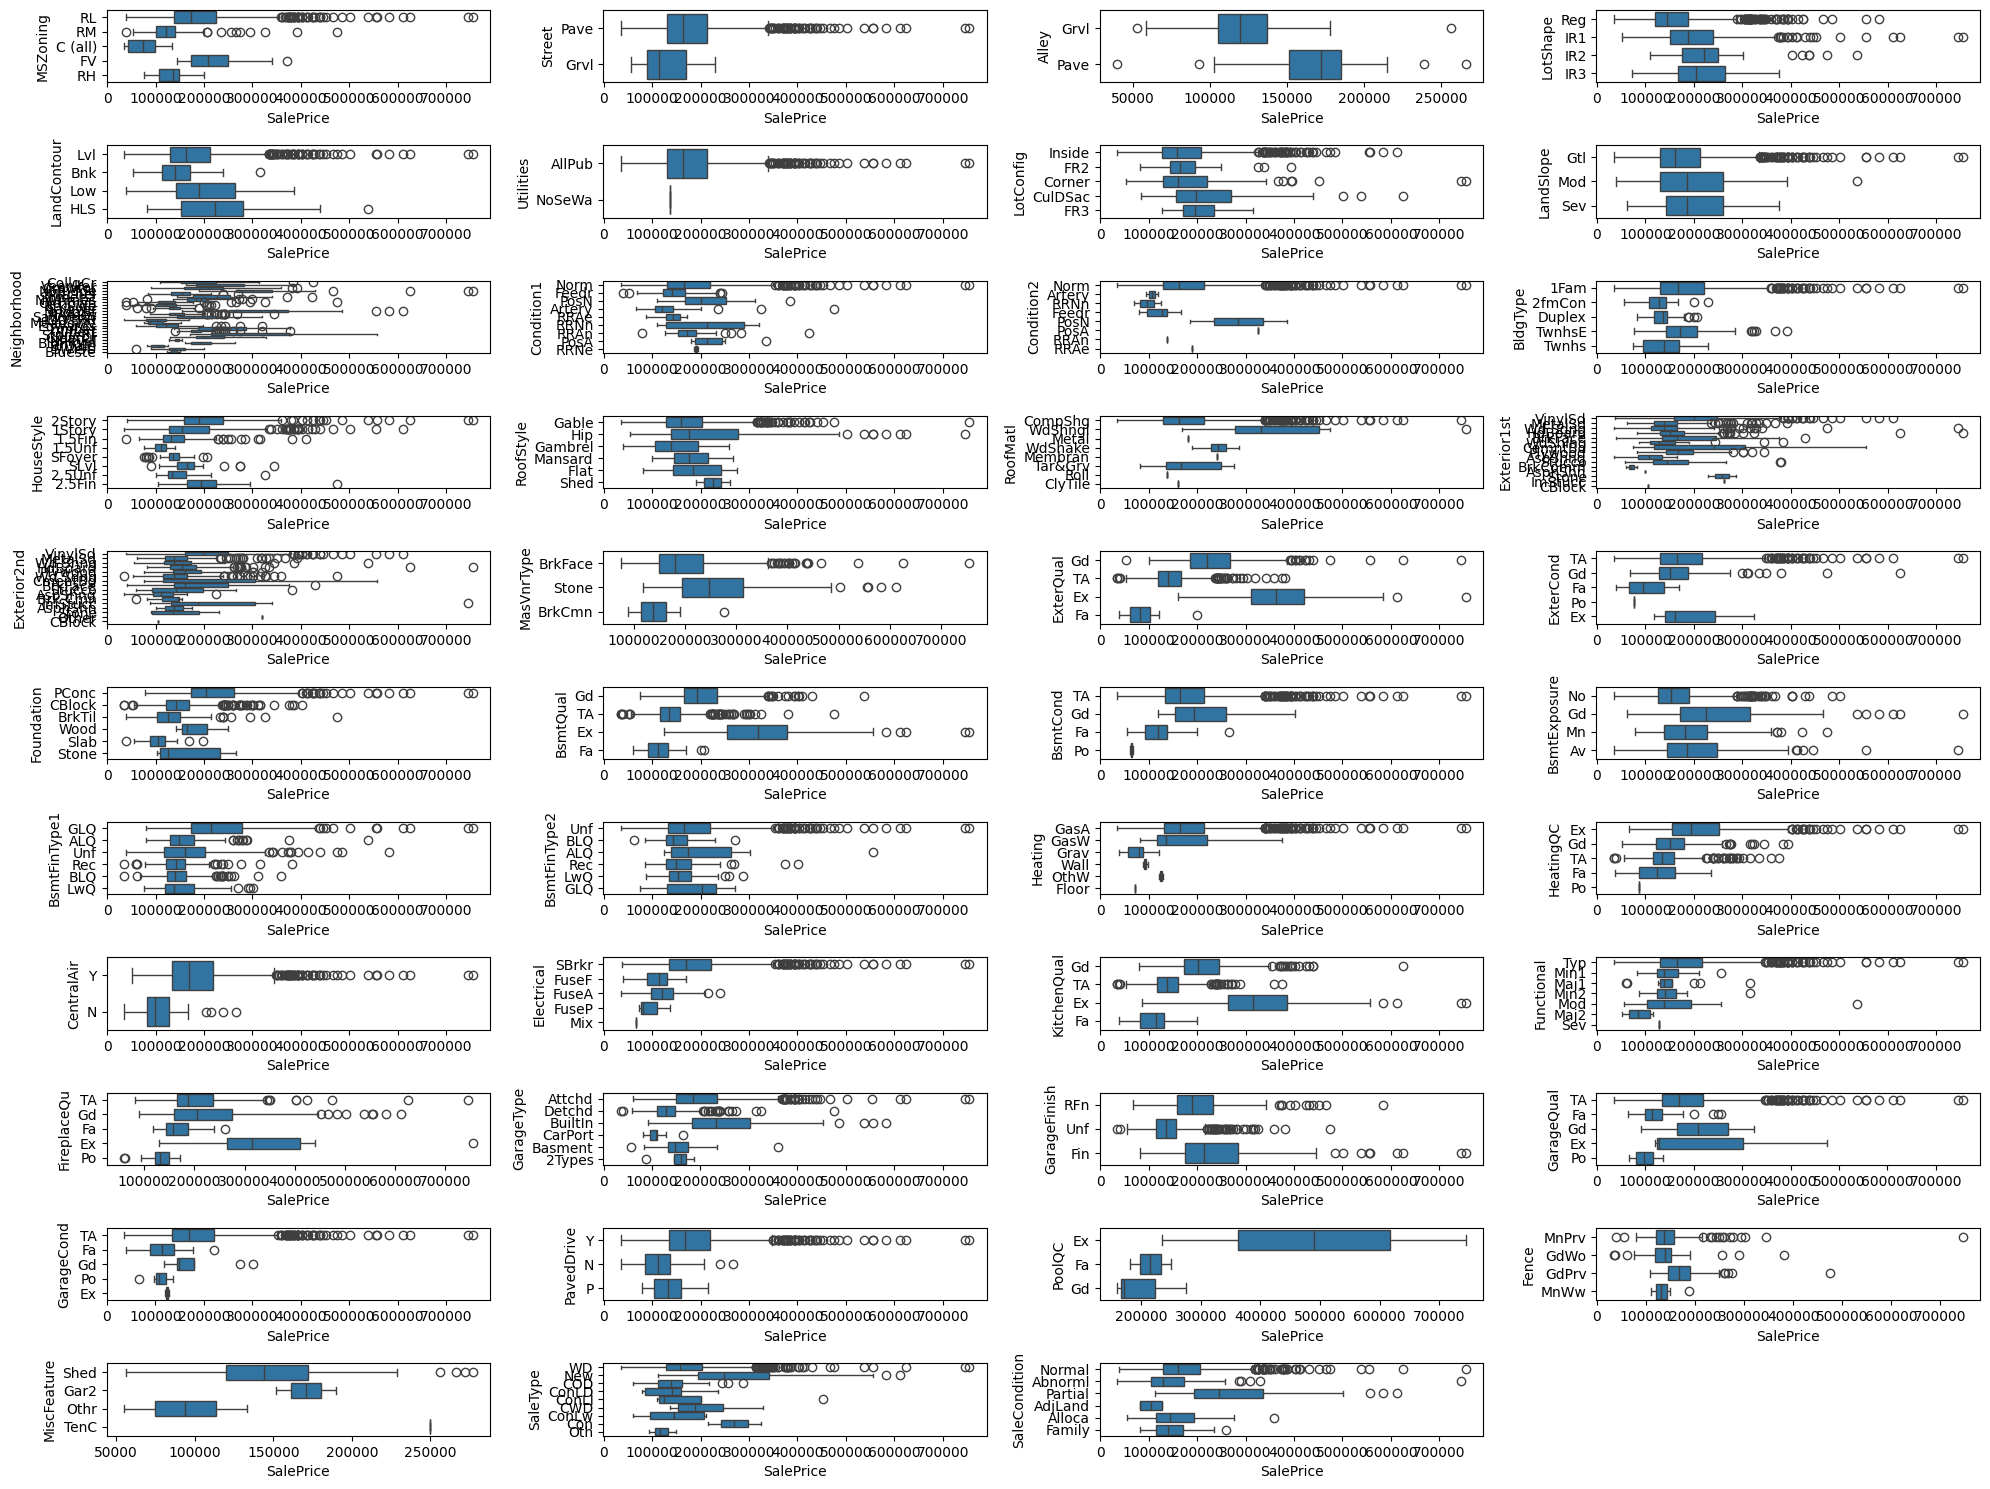

In [207]:
plt.figure(figsize= (40,30))
fig = plt.subplots(figsize = (20 , 15))

for i , j in enumerate(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition']):
  plt.subplot(11, 4, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.boxplot(data = df , y = cat_var[j], x = df['SalePrice'])
  plt.tight_layout()

#### Encoding Categorical Features

In [144]:

df['LotShape'] = df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['Utilities'] = df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
df['LandSlope'] = df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df['CentralAir'].map({'N':0,'Y':1})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['Functional'] = df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df['FireplaceQu'] = df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [145]:
# Checking the features after encoding

df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


#### Analyzing Unordered Featues

In [146]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

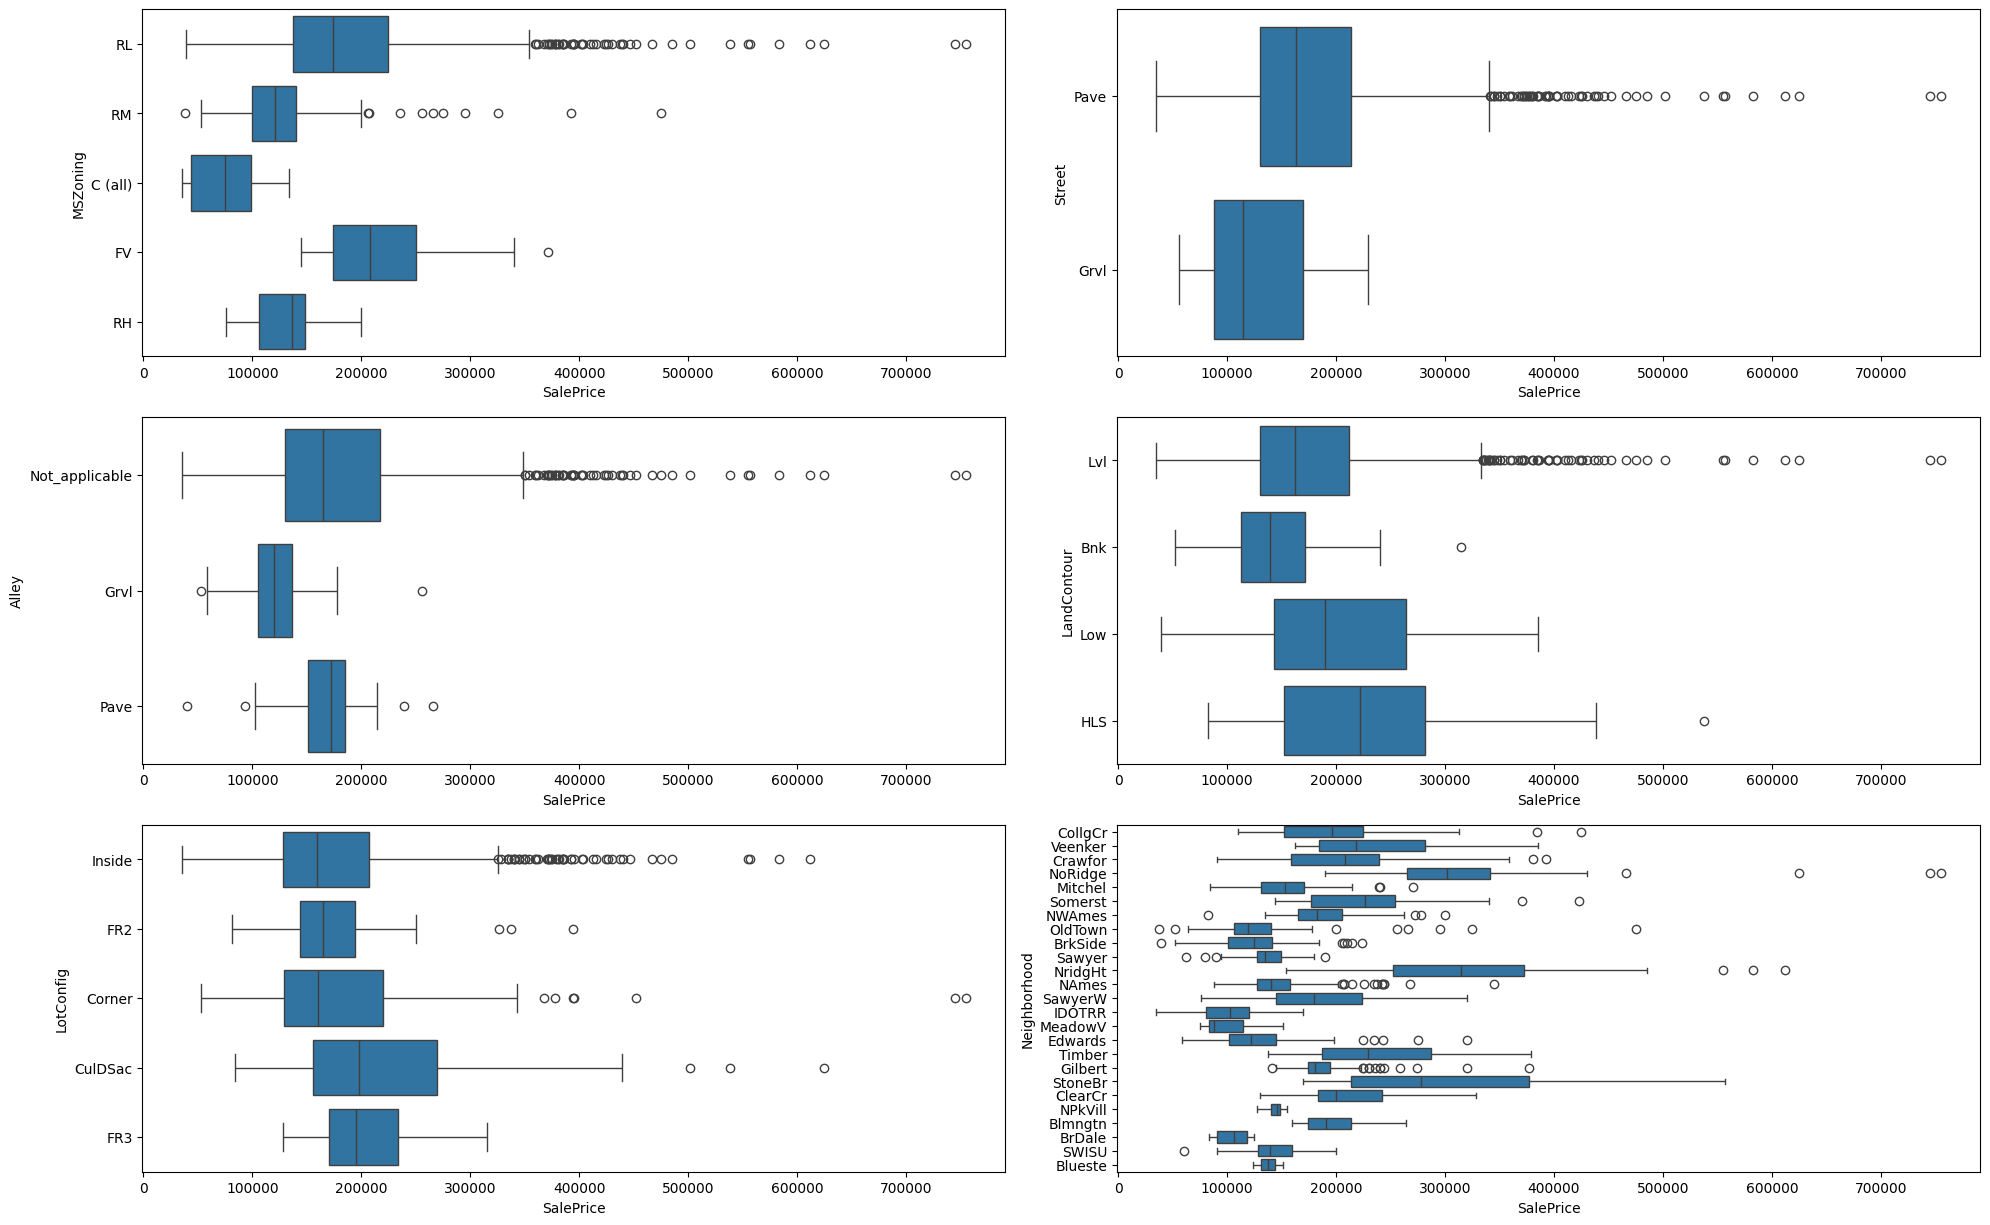

In [51]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

**Comment:**

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

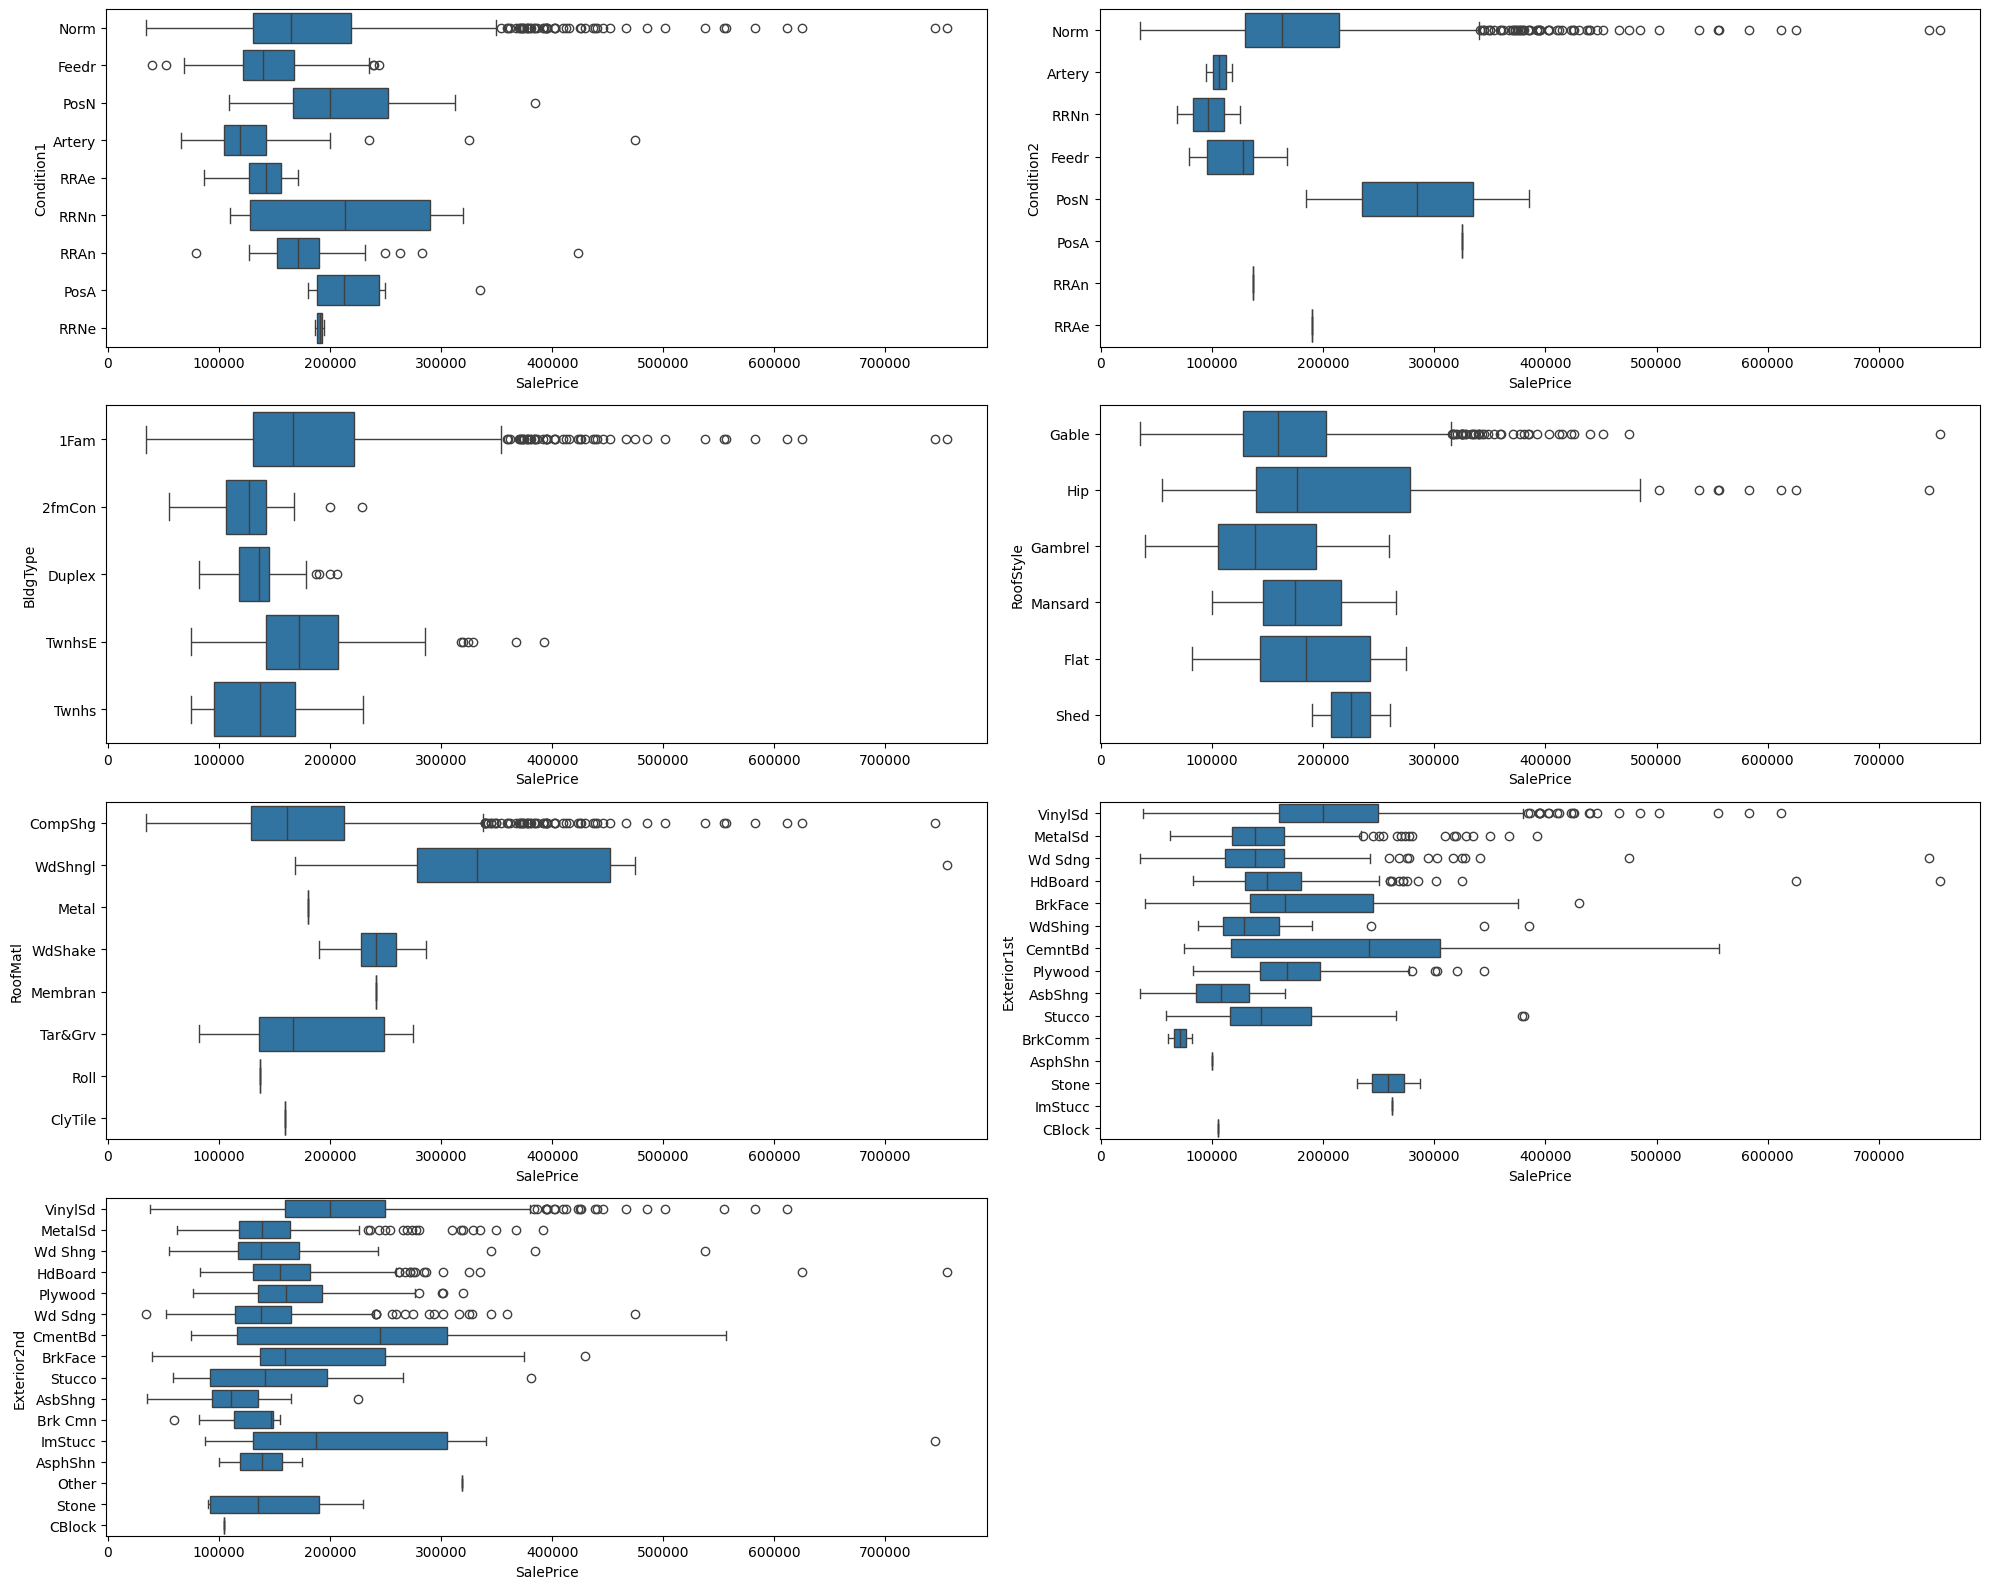

In [52]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

**Comment:**
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.



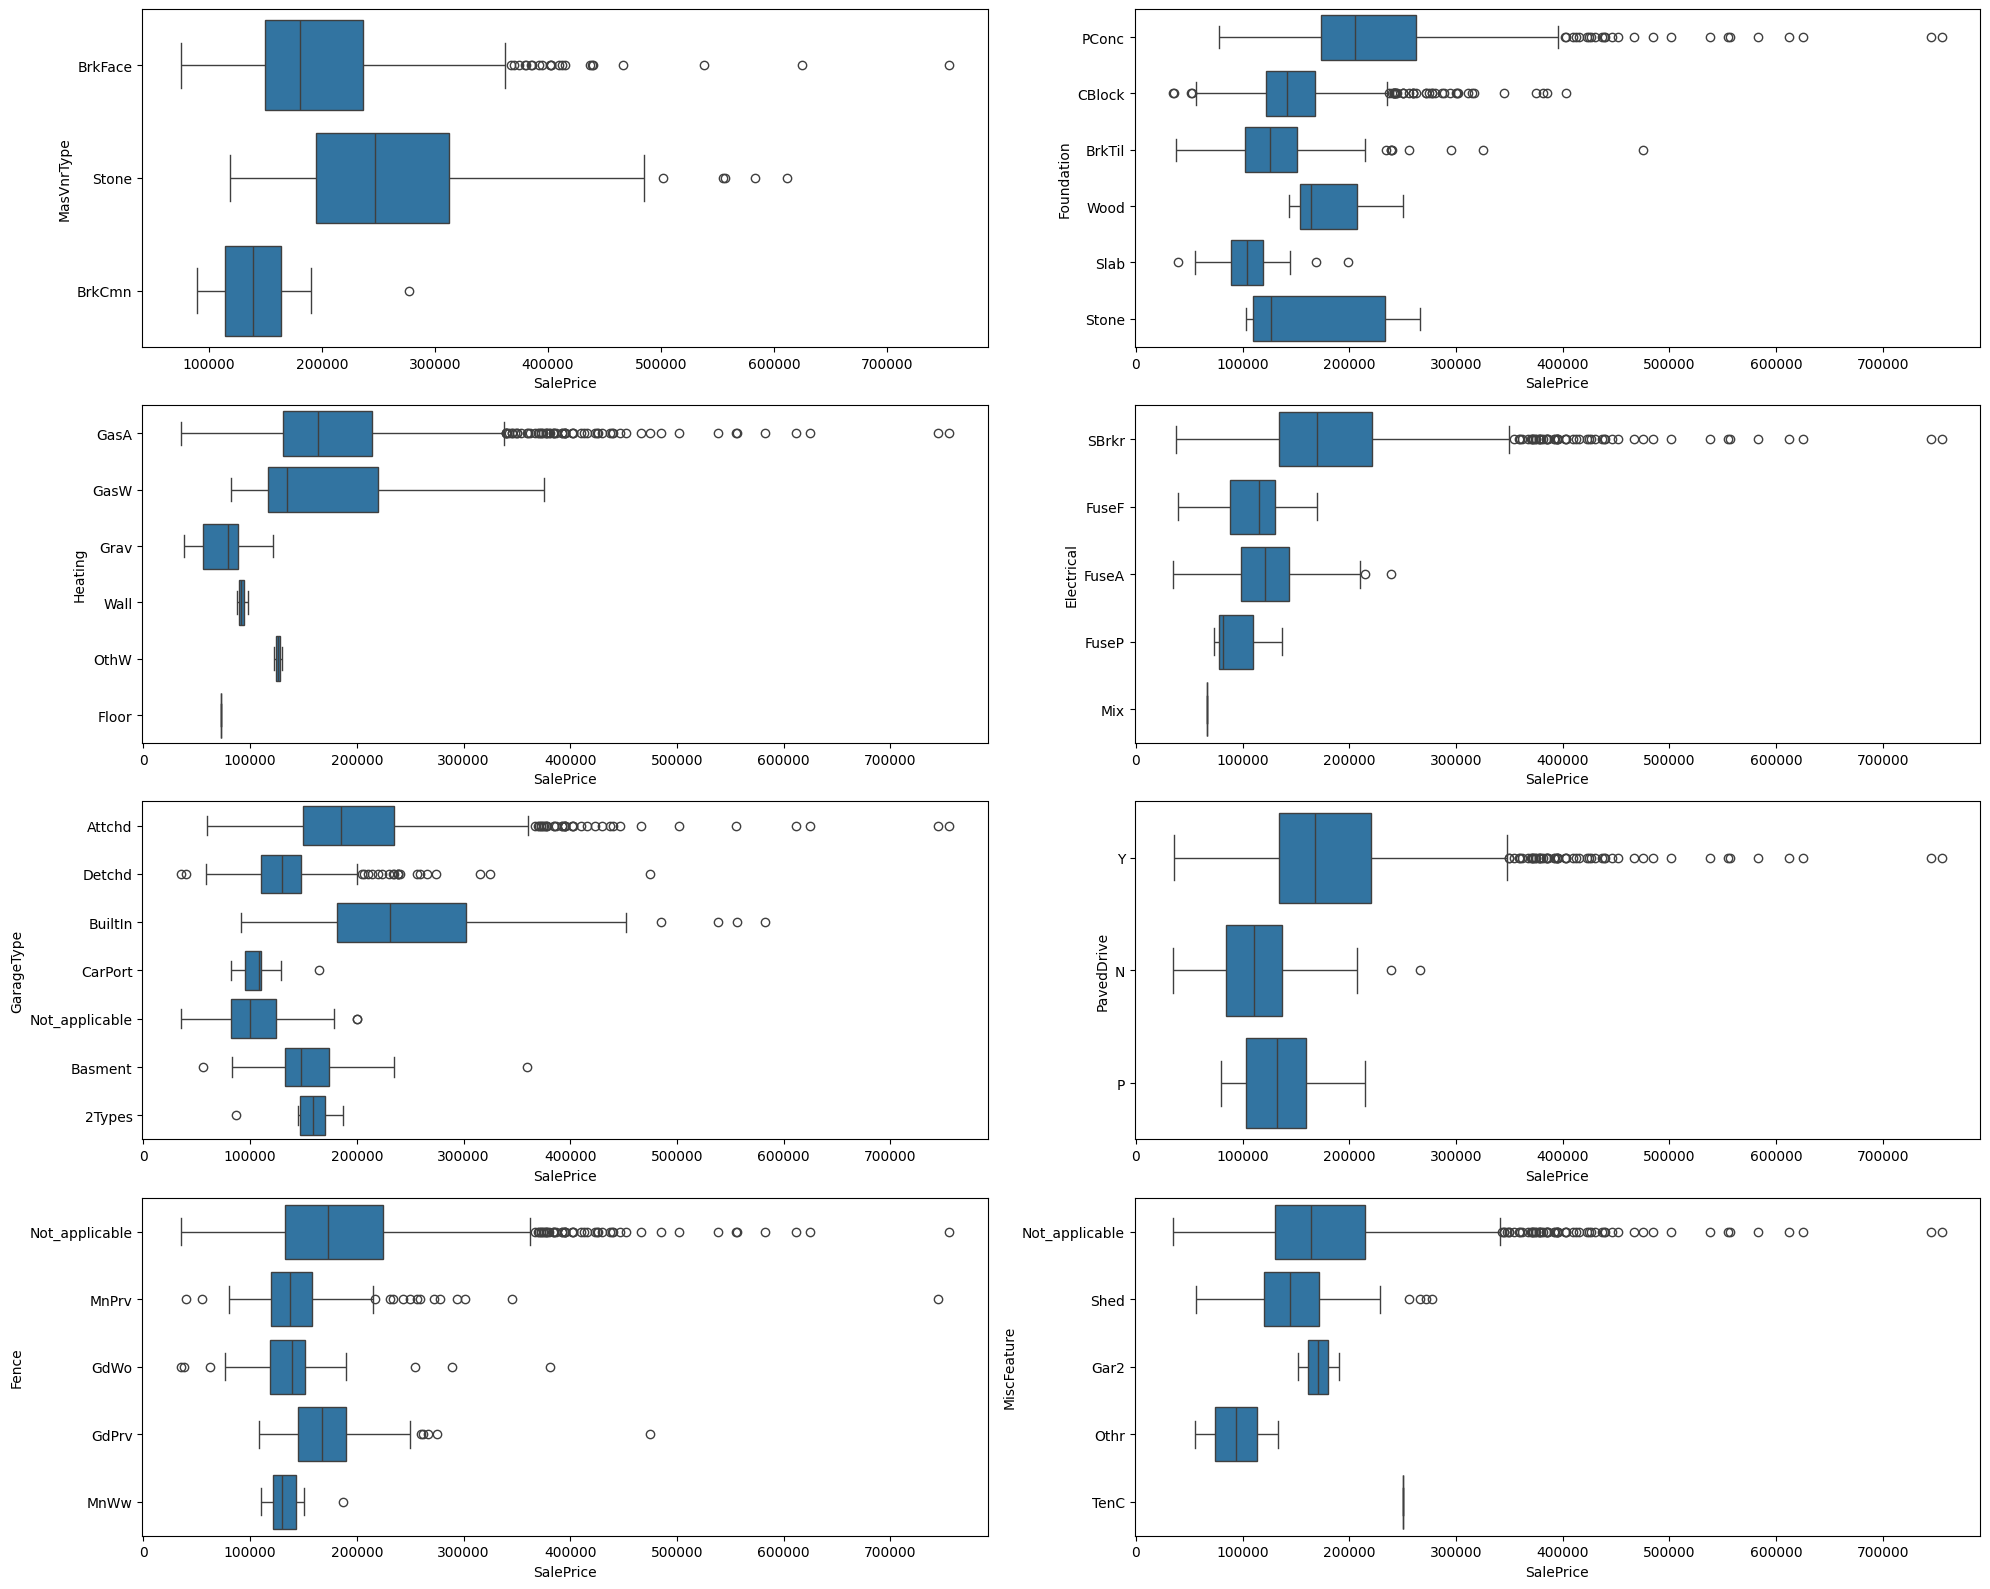

In [53]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

**Comment:**

- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)

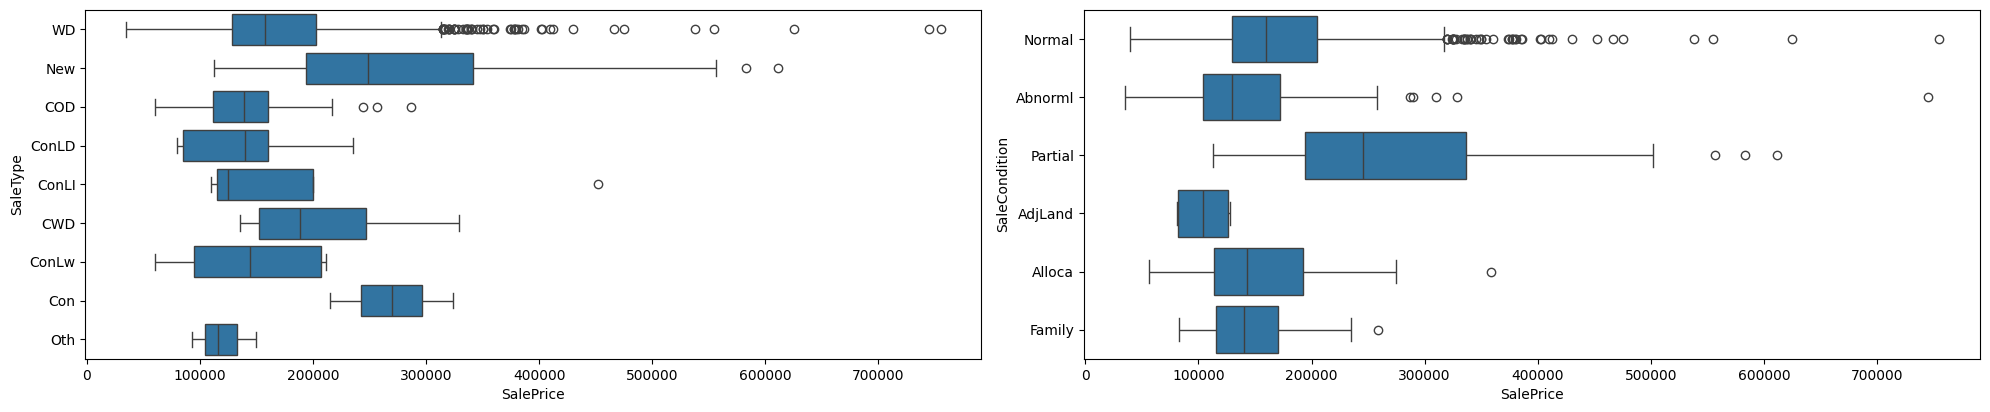

In [54]:
generate_boxplot(['SaleType','SaleCondition'])

**Comment:**

- Most of the houses are newly built, houses with warranty deed have high SalePrice
- Sale condition = Normal leads to high SalePrice

#### Encoding Categorical Variables

In [147]:
dummy_df = pd.get_dummies(df[unordered_features], drop_first=True)

In [148]:
dummy_df.shape

(1451, 143)

**Comment:**

- Adding 143 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [149]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)

print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_A

In [150]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 46)


In [151]:
df.shape

(1451, 68)

In [156]:
# Adding the dummy variables to the original dataframe
df = pd.concat([ df,dummy_df],axis=1)



In [157]:
df.shape

(1451, 275)

### Splitting into Train and Test Data

In [158]:
X = df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         3          3          0   
1          20         80.0   9600.0         3          3          0   
2          60         68.0  11250.0         0          3          0   
3          70         60.0   9550.0         0          3          0   
4          60         84.0  14260.0         0          3          0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_BuiltIn  \
0           3            7          5.0         18  ...               False   
1           0            6          7.5         45  ...               False   
2           3            7          5.0         20  ...               False   
3           3            7          5.0        106  ...               False   
4           3            8          5.0         21  ...               False   

   GarageType_Detchd  GarageType_Not_applicable  PavedDrive_Y  Fence_MnPrv  \
0              False                      False          True        False   
1              False                      False          True        False   
2              False                      False          True        False   
3               True                      False          True        False   
4              False                      False          True        False   

   Fence_Not_applicable  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0                  True         False         True                  True   
1                  True         False         True                  True   
2                  True         False         True                  True   
3                  True         False         True                 False   
4                  True         False         True                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 274 columns]

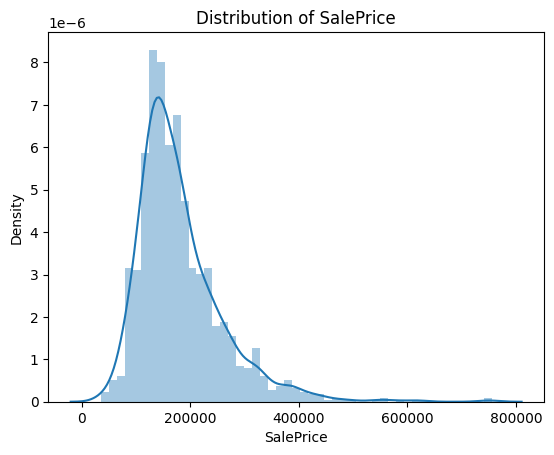

In [160]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(df['SalePrice'])
plt.show()

**Comment:** Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice.

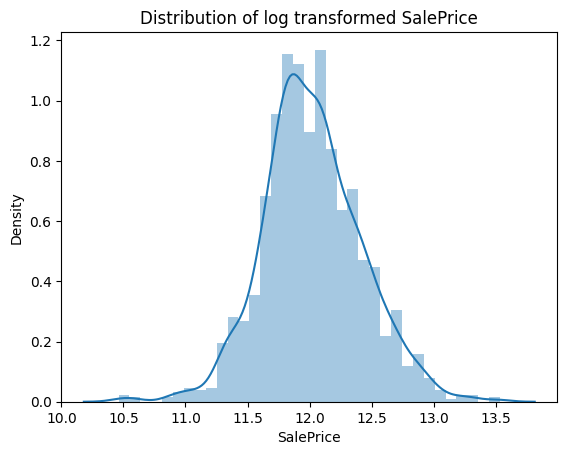

In [161]:
sns.distplot(np.log(df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [162]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 274)
(291, 274)
(1160,)
(291,)


In [165]:
X['LotFrontage'].isnull().any()

True

In [166]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [167]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [168]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

### Feature Scaling

In [169]:
X_train.values

array([[50, 54.0, 6342.0, ..., True, True, False],
       [145, 27.5, 2522.0, ..., True, True, False],
       [20, 70.0, 7931.0, ..., True, True, False],
       ...,
       [50, 50.0, 9000.0, ..., True, True, False],
       [20, 48.0, 10635.0, ..., True, True, False],
       [20, 67.0, 10656.0, ..., False, False, True]], dtype=object)

In [170]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [171]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [172]:
# Checking the features after

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
5      -0.137941     0.000000 -0.921280  0.747271   0.029374  -0.225421   
6      -0.936002    -0.558050  0.290659 -1.386037   0.029374  -0.225421   
7      -0.936002    -0.501621  0.014193  0.747271   0.029374  -0.225421   
8      -0.936002     0.000000  2.261973 -0.674935   0.029374  -0.225421   
9      -0.936002     0.344804  1.394851  0.747271   0.029374  -0.225421   
10     -0.936002    -1.065905 -0.040098  0.747271   0.029374  -0.225421   
11      0.128080     0.006234 -0.545420  0.747271   0.029374  -0.225421   
12      0.527110    -0.50

### Initial Feature Selection with RFE

In [173]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []

    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m)
    rfe = rfe.fit(X_tr_scaled, y_train)

    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))

    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [174]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'Electrical_SBrkr', 'GarageType_BuiltIn', 'Fence_MnPrv', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Condition1_Feedr', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofSty

In [175]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())

In [176]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     37.31
Date:                Mon, 20 May 2024   Prob (F-statistic):          8.81e-162
Time:                        06:42:06   Log-Likelihood:                -111.36
No. Observations:                1160   AIC:                             294.7
Df Residuals:                    1124   BIC:                             476.7
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

In [177]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     37.31
Date:                Mon, 20 May 2024   Prob (F-statistic):          8.81e-162
Time:                        06:42:09   Log-Likelihood:                -111.36
No. Observations:                1160   AIC:                             294.7
Df Residuals:                    1124   BIC:                             476.7
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

In [178]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     37.31
Date:                Mon, 20 May 2024   Prob (F-statistic):          8.81e-162
Time:                        06:42:11   Log-Likelihood:                -111.36
No. Observations:                1160   AIC:                             294.7
Df Residuals:                    1124   BIC:                             476.7
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

**Comment:** By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [179]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [180]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model,
                          param_grid = params,
                          scoring= 'neg_mean_absolute_error',
                          cv = 5,
                          return_train_score=True,
                          verbose = 1)
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)

  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### Ridge Regression

In [181]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 500.000000
ridge  Regression with  500
R2 score (train) :  0.5355951577943481
R2 score (test) :  0.4683222319059732
RMSE (train) :  0.26687573563076705
RMSE (test) :  0.311742900879948


**Comment:** Ridge Regression model was able to achieve R2 score of 0.46 on test data i.e. 46% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.2668 on test data, that means the prediction made by the model can off by 0.2668 unit.

### Lasso Regression

In [182]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R2 score (train) :  0.537392832939777
R2 score (test) :  0.4720430455219492
RMSE (train) :  0.26635870715858484
RMSE (test) :  0.31065015841939564


### Comparing Model Coefficients

In [183]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=9.0)  Lasso (alpha=0.0001)
LandContour_Lvl                -0.001098         -0.000000e+00
LandContour_Lvl                -0.001098         -0.000000e+00
LandContour_Lvl                -0.001098         -0.000000e+00
LandContour_Lvl                -0.001098         -0.000000e+00
LandContour_Lvl                -0.001098         -0.000000e+00
LotConfig_CulDSac               0.001696          3.233119e-02
LotConfig_CulDSac               0.001696          8.452171e-16
LotConfig_CulDSac               0.001696          0.000000e+00
LotConfig_CulDSac               0.001696          0.000000e+00
LotConfig_CulDSac               0.001696          0.000000e+00
LotConfig_Inside               -0.000861         -1.897334e-02
LotConfig_Inside               -0.000861         -0.000000e+00
LotConfig_Inside               -0.000861         -0.000000e+00
LotConfig_Inside               -0.000861         -0.000000e+00
LotConfig_Inside               -0.000861         -0.000000e+00
Neighborhood_CollgCr           -0.000772         -0.000000e+00
Neighborhood_CollgCr           -0.000772         -0.000000e+00
Neighborhood_CollgCr           -0.000772         -0.000000e+00
Neighborhood_CollgCr           -0.000772         -0.000000e+00
Neighborhood_CollgCr           -0.000772         -0.000000e+00
Neighborhood_Edwards           -0.002102         -5.350175e-02
Neighborhood_Edwards           -0.002102         -3.728328e-15
Neighborhood_Edwards           -0.002102         -0.000000e+00
Neighborhood_Edwards           -0.002102         -0.000000e+00
Neighborhood_Edwards           -0.002102         -0.000000e+00
Neighborhood_Gilbert           -0.000564         -0.000000e+00
Neighborhood_Gilbert           -0.000564         -0.000000e+00
Neighborhood_Gilbert           -0.000564         -0.000000e+00
Neighborhood_Gilbert           -0.000564         -0.000000e+00
Neighborhood_Gilbert           -0.000564         -0.000000e+00
Neighborhood_NAmes             -0.000855         -1.911898e-02
Neighborhood_NAmes             -0.000855         -0.000000e+00
Neighborhood_NAmes             -0.000855         -0.000000e+00
Neighborhood_NAmes             -0.000855         -0.000000e+00
Neighborhood_NAmes             -0.000855         -0.000000e+00
Neighborhood_NWAmes             0.000993          1.334133e-02
Neighborhood_NWAmes             0.000993          1.199795e-15
Neighborhood_NWAmes             0.000993          1.180808e-17
Neighborhood_NWAmes             0.000993          1.333943e-17
Neighborhood_NWAmes             0.000993          2.099614e-17
Neighborhood_NridgHt            0.003560          5.395040e-02
Neighborhood_NridgHt            0.003560          4.134014e-15
Neighborhood_NridgHt            0.003560          3.026793e-18
Neighborhood_NridgHt            0.003560          3.026793e-18
Neighborhood_NridgHt            0.003560          1.878287e-18
Neighborhood_Sawyer            -0.000814         -2.026848e-02
Neighborhood_Sawyer            -0.000814         -5.468566e-16
Neighborhood_Sawyer            -0.000814         -4.829709e-17
Neighborhood_Sawyer            -0.000814         -2.612852e-17
Neighborhood_Sawyer            -0.000814         -2.612852e-17
Neighborhood_Somerst            0.000938          1.596406e-02
Neighborhood_Somerst            0.000938          9.873807e-16
Neighborhood_Somerst            0.000938          1.381797e-17
Neighborhood_Somerst            0.000938          1.381797e-17
Neighborhood_Somerst            0.000938          1.534931e-17
Condition1_Feedr               -0.000642         -1.260654e-02
Condition1_Feedr               -0.000642         -2.201304e-18
Condition1_Feedr               -0.000642         -0.000000e+00
Condition1_Feedr               -0.000642         -0.000000e+00
Condition1_Feedr               -0.000642         -0.000000e+00
Condition1_Norm                 0.000581          9.219731e-03
Condition1_Norm                 0.000581          3.373738e-18
Condition1_Norm                 0.000581          1.45

In [185]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:10])

[209526 156900 215195 131817 117899 149377 231224 202165 200914 123298]


### Final Model

Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [186]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

Lasso (alpha=0.0001)
Foundation_PConc               8.436981e-02
MasVnrType_BrkFace             5.867217e-02
Exterior2nd_VinylSd            5.824176e-02
Neighborhood_NridgHt           5.395040e-02
MasVnrType_Stone               5.347323e-02
Electrical_SBrkr               4.606340e-02
Exterior2nd_Wd Sdng            4.100360e-02
Foundation_PConc               3.240088e-02
LotConfig_CulDSac              3.233119e-02
SaleCondition_Partial          2.901782e-02
RoofStyle_Hip                  2.330024e-02
Exterior2nd_HdBoard            2.246522e-02
Foundation_CBlock              1.953058e-02
Foundation_PConc               1.920028e-02
Exterior2nd_MetalSd            1.833448e-02
Exterior2nd_VinylSd            1.818903e-02
Neighborhood_Somerst           1.596406e-02
Exterior2nd_Plywood            1.513815e-02
Exterior2nd_VinylSd            1.442631e-02
Neighborhood_NWAmes            1.334133e-02
GarageType_BuiltIn             1.332327e-02
Exterior2nd_HdBoard            1.319495e-02
Exterior2nd_Plywood            1.261065e-02
Exterior2nd_MetalSd            1.237417e-02
Exterior2nd_HdBoard            1.103243e-02
SaleCondition_Partial          1.093543e-02
Foundation_PConc               1.091357e-02
Exterior2nd_Wd Sdng            1.043650e-02
Neighborhood_NWAmes            9.659949e-03
Condition1_Norm                9.219731e-03
Electrical_SBrkr               7.959380e-03
GarageType_BuiltIn             6.993237e-03
Exterior2nd_HdBoard            5.481071e-03
MasVnrType_BrkFace             5.019337e-03
GarageType_BuiltIn             3.114654e-03
MasVnrType_BrkFace             1.795704e-03
Exterior2nd_Wd Sdng            1.743757e-03
Foundation_CBlock              1.642573e-03
Neighborhood_Somerst           1.331544e-03
LotConfig_CulDSac              1.118805e-03
Exterior2nd_MetalSd            1.101037e-03
Electrical_SBrkr               1.073860e-03
Exterior2nd_Plywood            4.393640e-04
Exterior2nd_MetalSd            4.182161e-04
Neighborhood_NWAmes            3.973367e-04
Neighborhood_Somerst           1.354946e-04
Exterior2nd_Plywood            1.024933e-04
Electrical_SBrkr               5.540032e-05
LotConfig_CulDSac              8.250156e-06
MasVnrType_BrkFace             5.843670e-06
Neighborhood_NridgHt           4.457884e-06
RoofStyle_Hip                  1.115567e-07
Electrical_SBrkr               4.809694e-15
Neighborhood_NridgHt           4.134014e-15
Neighborhood_NWAmes            1.199795e-15
Exterior2nd_MetalSd            1.079201e-15
Exterior2nd_VinylSd            1.035750e-15
Neighborhood_Somerst           9.873807e-16
LotConfig_CulDSac              8.452171e-16
Neighborhood_NWAmes            3.291309e-16
Exterior2nd_VinylSd            3.210435e-16
Exterior2nd_VinylSd            3.142481e-16
Foundation_CBlock              2.713227e-16
Exterior2nd_MetalSd            2.623500e-16
Exterior2nd_Wd Sdng            1.671436e-16
Exterior2nd_MetalSd            2.965779e-17
GarageType_BuiltIn             2.630798e-17
Electrical_SBrkr               2.462111e-17
Neighborhood_NWAmes            2.099614e-17
Electrical_SBrkr               1.926141e-17
Electrical_SBrkr               1.926141e-17
Electrical_SBrkr               1.659353e-17
Electrical_SBrkr               1.659353e-17
Foundation_PConc               1.544502e-17
Neighborhood_Somerst           1.534931e-17
Neighborhood_NWAmes            1.433240e-17
Electrical_SBrkr               1.415295e-17
Neighborhood_Somerst           1.381797e-17
Neighborhood_Somerst           1.381797e-17
Neighborhood_NWAmes            1.333943e-17
LotConfig_CulDSac              1.312408e-17
MasVnrType_BrkFace             1.266946e-17
Neighborhood_NWAmes            1.180808e-17
Neighborhood_Somerst           1.140132e-17
Neighborhood_NWAmes            1.126972e-17
Neighborhood_NWAmes            1.126972e-17
Exterior2nd_MetalSd            9.917833e-18
Exterior2nd_Plywood            9.678561e-18
Neighborhood_NWAmes            8.410418e-18
Exterior2nd_Wd Sdng            7.692601e-18
GarageType_BuiltIn 

In [187]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['Foundation_PConc', 'MasVnrType_BrkFace', 'Exterior2nd_VinylSd',
       'Neighborhood_NridgHt', 'MasVnrType_Stone', 'Electrical_SBrkr',
       'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'LotConfig_CulDSac',
       'SaleCondition_Partial'],
      dtype='object')

# Final Output

In [188]:
# Model Building
ridge_model = Ridge(alpha=18.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=18.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=18.0
R2 score (train) :  0.5374
R2 score (test) :  0.4719
RMSE (train) :  0.2664
RMSE (test) :  0.3107


In [189]:
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.5373
R2 score (test) :  0.472
RMSE (train) :  0.2664
RMSE (test) :  0.3107


In [190]:
model_coefficients['Ridge (alpha = 18.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=9.0)  Lasso (alpha=0.0001)  \
LandContour_Lvl                -0.001098         -0.000000e+00   
LandContour_Lvl                -0.001098         -0.000000e+00   
LandContour_Lvl                -0.001098         -0.000000e+00   
LandContour_Lvl                -0.001098         -0.000000e+00   
LandContour_Lvl                -0.001098         -0.000000e+00   
LotConfig_CulDSac               0.001696          3.233119e-02   
LotConfig_CulDSac               0.001696          8.452171e-16   
LotConfig_CulDSac               0.001696          0.000000e+00   
LotConfig_CulDSac               0.001696          0.000000e+00   
LotConfig_CulDSac               0.001696          0.000000e+00   
LotConfig_Inside               -0.000861         -1.897334e-02   
LotConfig_Inside               -0.000861         -0.000000e+00   
LotConfig_Inside               -0.000861         -0.000000e+00   
LotConfig_Inside               -0.000861         -0.000000e+00   
LotConfig_Inside               -0.000861         -0.000000e+00   
Neighborhood_CollgCr           -0.000772         -0.000000e+00   
Neighborhood_CollgCr           -0.000772         -0.000000e+00   
Neighborhood_CollgCr           -0.000772         -0.000000e+00   
Neighborhood_CollgCr           -0.000772         -0.000000e+00   
Neighborhood_CollgCr           -0.000772         -0.000000e+00   
Neighborhood_Edwards           -0.002102         -5.350175e-02   
Neighborhood_Edwards           -0.002102         -3.728328e-15   
Neighborhood_Edwards           -0.002102         -0.000000e+00   
Neighborhood_Edwards           -0.002102         -0.000000e+00   
Neighborhood_Edwards           -0.002102         -0.000000e+00   
Neighborhood_Gilbert           -0.000564         -0.000000e+00   
Neighborhood_Gilbert           -0.000564         -0.000000e+00   
Neighborhood_Gilbert           -0.000564         -0.000000e+00   
Neighborhood_Gilbert           -0.000564         -0.000000e+00   
Neighborhood_Gilbert           -0.000564         -0.000000e+00   
Neighborhood_NAmes             -0.000855         -1.911898e-02   
Neighborhood_NAmes             -0.000855         -0.000000e+00   
Neighborhood_NAmes             -0.000855         -0.000000e+00   
Neighborhood_NAmes             -0.000855         -0.000000e+00   
Neighborhood_NAmes             -0.000855         -0.000000e+00   
Neighborhood_NWAmes             0.000993          1.334133e-02   
Neighborhood_NWAmes             0.000993          1.199795e-15   
Neighborhood_NWAmes             0.000993          1.180808e-17   
Neighborhood_NWAmes             0.000993          1.333943e-17   
Neighborhood_NWAmes             0.000993          2.099614e-17   
Neighborhood_NridgHt            0.003560          5.395040e-02   
Neighborhood_NridgHt            0.003560          4.134014e-15   
Neighborhood_NridgHt            0.003560          3.026793e-18   
Neighborhood_NridgHt            0.003560          3.026793e-18   
Neighborhood_NridgHt            0.003560          1.878287e-18   
Neighborhood_Sawyer            -0.000814         -2.026848e-02   
Neighborhood_Sawyer            -0.000814         -5.468566e-16   
Neighborhood_Sawyer            -0.000814         -4.829709e-17   
Neighborhood_Sawyer            -0.000814         -2.612852e-17   
Neighborhood_Sawyer            -0.000814         -2.612852e-17   
Neighborhood_Somerst            0.000938          1.596406e-02   
Neighborhood_Somerst            0.000938          9.873807e-16   
Neighborhood_Somerst            0.000938          1.381797e-17   
Neighborhood_Somerst            0.000938          1.381797e-17   
Neighborhood_Somerst            0.000938          1.534931e-17   
Condition1_Feedr               -0.000642         -1.260654e-02   
Condition1_Feedr               -0.000642         -2.201304e-18   
Condition1_Feedr               -0.000642         -0.000000e+00   
Condition1_Feedr               -0.000642         -0.000000e+00   
Condition1_Feedr               -0.000642         -0.000000e+00 

In [199]:
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(5)

Ridge (alpha=9.0)  Lasso (alpha=0.0001)  \
Foundation_PConc               0.006842              0.084370   
Exterior2nd_VinylSd            0.001851              0.058242   
MasVnrType_BrkFace             0.003194              0.058672   
Neighborhood_NridgHt           0.003560              0.053950   
MasVnrType_Stone               0.002095              0.053473   

                      Ridge (alpha = 18.0)  Lasso (alpha = 0.0002)  
Foundation_PConc                  0.007348                0.084437  
Exterior2nd_VinylSd               0.003704                0.061361  
MasVnrType_BrkFace                0.003279                0.058699  
Neighborhood_NridgHt              0.003594                0.053959  
MasVnrType_Stone                  0.002142                0.053282

In [200]:
model_coefficients.sort_values(by='Ridge (alpha = 18.0)', ascending=False).head(5)

Ridge (alpha=9.0)  Lasso (alpha=0.0001)  \
Foundation_PConc           0.006842          3.732646e-18   
Foundation_PConc           0.006842          3.349811e-18   
Foundation_PConc           0.006842          8.436981e-02   
Foundation_PConc           0.006842          1.544502e-17   
Foundation_PConc           0.006842          4.881153e-18   

                  Ridge (alpha = 18.0)  Lasso (alpha = 0.0002)  
Foundation_PConc              0.007348                0.000000  
Foundation_PConc              0.007348                0.000000  
Foundation_PConc              0.007348                0.084437  
Foundation_PConc              0.007348                0.000000  
Foundation_PConc              0.007348                0.000000

In [201]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

Ridge (alpha=9.0)  Lasso (alpha=0.0001)  \
Foundation_PConc               0.006842              0.084370   
MasVnrType_BrkFace             0.003194              0.058672   
Exterior2nd_VinylSd            0.001851              0.058242   
Neighborhood_NridgHt           0.003560              0.053950   
MasVnrType_Stone               0.002095              0.053473   

                      Ridge (alpha = 18.0)  Lasso (alpha = 0.0002)  
Foundation_PConc                  0.007348                0.084437  
MasVnrType_BrkFace                0.003279                0.058699  
Exterior2nd_VinylSd               0.003704                0.061361  
Neighborhood_NridgHt              0.003594                0.053959  
MasVnrType_Stone                  0.002142                0.053282

In [202]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [203]:
lasso_model.coef_

array([ 4.61954009e-02,  7.57378681e-02,  5.99537232e-03,  5.28077710e-03,
        5.54891787e-02,  6.49053592e-05,  4.02014463e-02,  3.22918078e-02,
        1.70518348e-02, -8.71619360e-03,  6.65748900e-02, -2.17852851e-02,
        6.48266059e-02,  2.68748683e-02,  8.38676308e-02, -0.00000000e+00,
        2.96317795e-02,  5.49912233e-02,  1.85739707e-02,  3.82476761e-03,
       -2.10755407e-02, -1.84689982e-02,  1.69374736e-02,  3.36470048e-02,
        8.49430351e-03,  1.96173478e-02, -2.54093758e-02, -3.20342554e-02,
       -4.26565143e-03, -1.80469492e-02, -7.76250295e-03, -4.10750956e-02,
        3.57206770e-03,  3.30145118e-02,  2.77563513e-02,  1.46373281e-02,
       -1.79545865e-03,  1.07288936e-02,  1.18316003e-02,  9.14486767e-03])

In [204]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

Lasso
GarageArea   0.083868
LotArea      0.075738
KitchenQual  0.066575
Fireplaces   0.064827
BsmtQual     0.055489